<a href="https://colab.research.google.com/github/miruthunjaya/CODSOFT/blob/INTERNSHIP/TASK1_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK-1 :   TITANIC SURVIVAL PREDICTION**

---



**BATCH :**  DEC Batch A23

**DOMAIN :** DATA SCIENCE

**AIM :**    To build a model that predicts whether a passenger on the Titanic survived or not using Titanic dataset.




**ABOUT DATASET**

  The Titanic dataset is popular for data analysis and machine learning. It contains information about the passengers onboard the Titanic, including features like age, gender, fare, cabin, and survival status. We will perform exploratory data analysis (EDA) on the Titanic dataset using Python in this project.

The Titanic dataset is available in Kaggle as https://www.kaggle.com/datasets/yasserh/titanic-dataset .

It consists of the following columns:

* Survived: Survival status (0 = No, 1 = Yes)
* PassengerId: Unique Id for a passenger
* Pclass: Passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class)
* Sex: Passenger’s gender
* Age: Passenger’s age
* SibSp: Number of siblings/spouses aboard
* Parch: Number of parents/children aboard
* Fare: Fare paid for the ticket
* Embarked: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
* Alone: Whether the passenger is alone or not (True or False)


#Importing Important Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#Importing Dataset

In [1]:
#Uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [4]:
#calling the dataset
import io
titanic = pd.read_csv(io.BytesIO(uploaded['Titanic-Dataset.csv']))

#Data Inspection

In [5]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
#basic info about the dataype
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
#dimensions
titanic.shape

(891, 12)

In [9]:
#datatypes
pd.DataFrame(titanic.dtypes)

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [10]:
# Let's check the column names
titanic.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [11]:
#to display stats about data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
titanic.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


#Data Wrangling

    Data wrangling means cleaning the data, removing the null values,
    drapping unwanted columns, adding new ones if needed.

In [13]:
# Checking for the null values

total = titanic.isnull().sum().sort_values(ascending=False)
percent_1 = titanic.isnull().sum()/titanic.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0


Age and Cabin has most null values and Embarked too has null values

<Axes: >

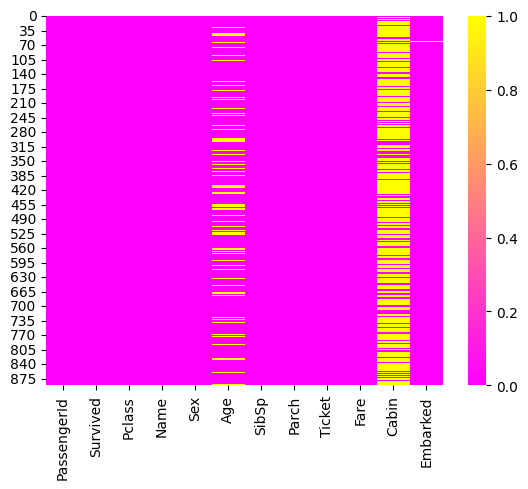

In [14]:
# plot the above in heatmap
sns.heatmap(titanic.isnull(), cmap='spring')

Here, yellow colour is showing the null values, highest in Cabin followed by Age;

#Distribution of variables according to survivals

In [ ]:
#function to show distribution of variables according to survival
def vars_acc_to_surv(df, colname):
     plt.figure(figsize=(5,3))
     sns.kdeplot(titanic, x=colname, hue='Survived')
     plt.title(f'{colname} distribution according to the survival')

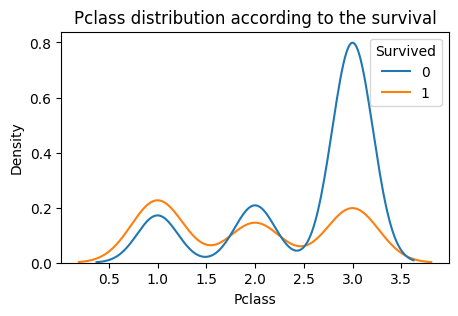

In [ ]:
#Pclass distribution according to survival status
vars_acc_to_surv(titanic,'Pclass')

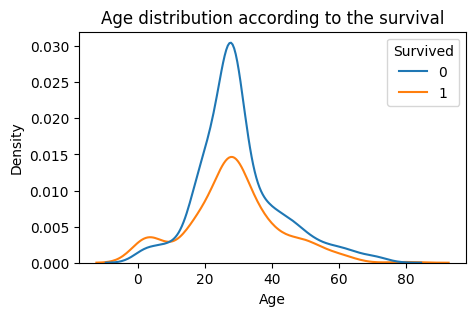

In [ ]:
#age distribution according to survival status
vars_acc_to_surv(titanic,'Age')

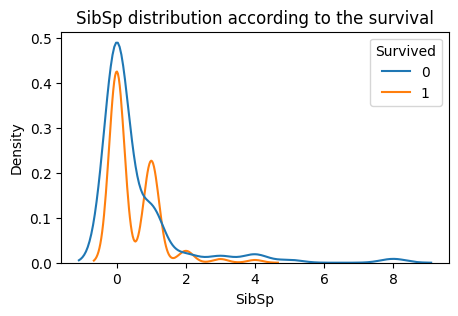

In [ ]:
#SibSp distribution according to survival status
vars_acc_to_surv(titanic,'SibSp')

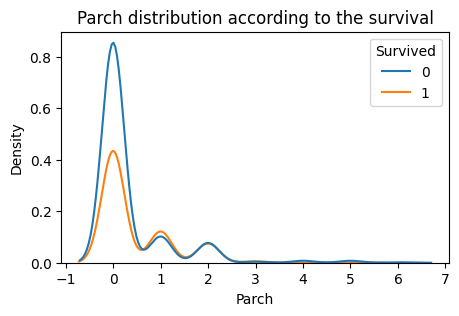

In [ ]:
#Parch distribution according to survival status
vars_acc_to_surv(titanic,'Parch')

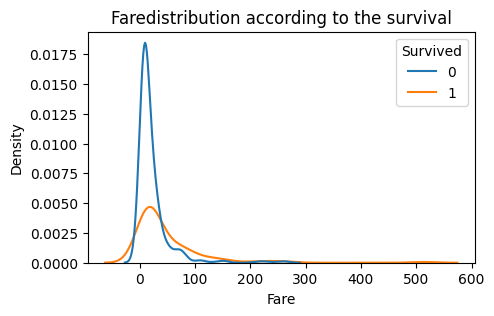

In [ ]:
#fare distribution according to survival status
vars_acc_to_surv(titanic,'Fare')

#Data Visualization

In [ ]:
#number of passengers
print("Total number of passengers=",len(titanic))

Total number of passengers= 891


In [ ]:
#number of survivors and deaths
print("Total number of survivors=",len(titanic[titanic["Survived"]==1]))
print("Total number of deaths=",len(titanic[titanic["Survived"]==0]))

Total number of survivors= 342
Total number of deaths= 549


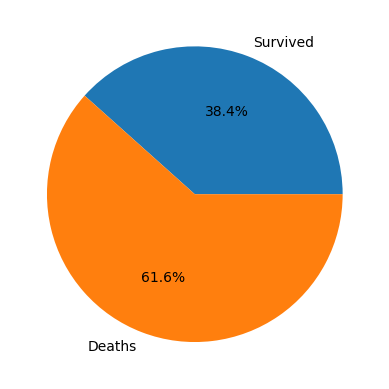

In [ ]:
# representing the above on a piechart
no_survivors=len(titanic[titanic["Survived"]==1])
no_deaths=len(titanic[titanic["Survived"]==0])
plt.pie([no_survivors,no_deaths],labels=(['Survived','Deaths']),autopct='%1.1f%%')
plt.title=("Survivors and Deaths")
plt.show()

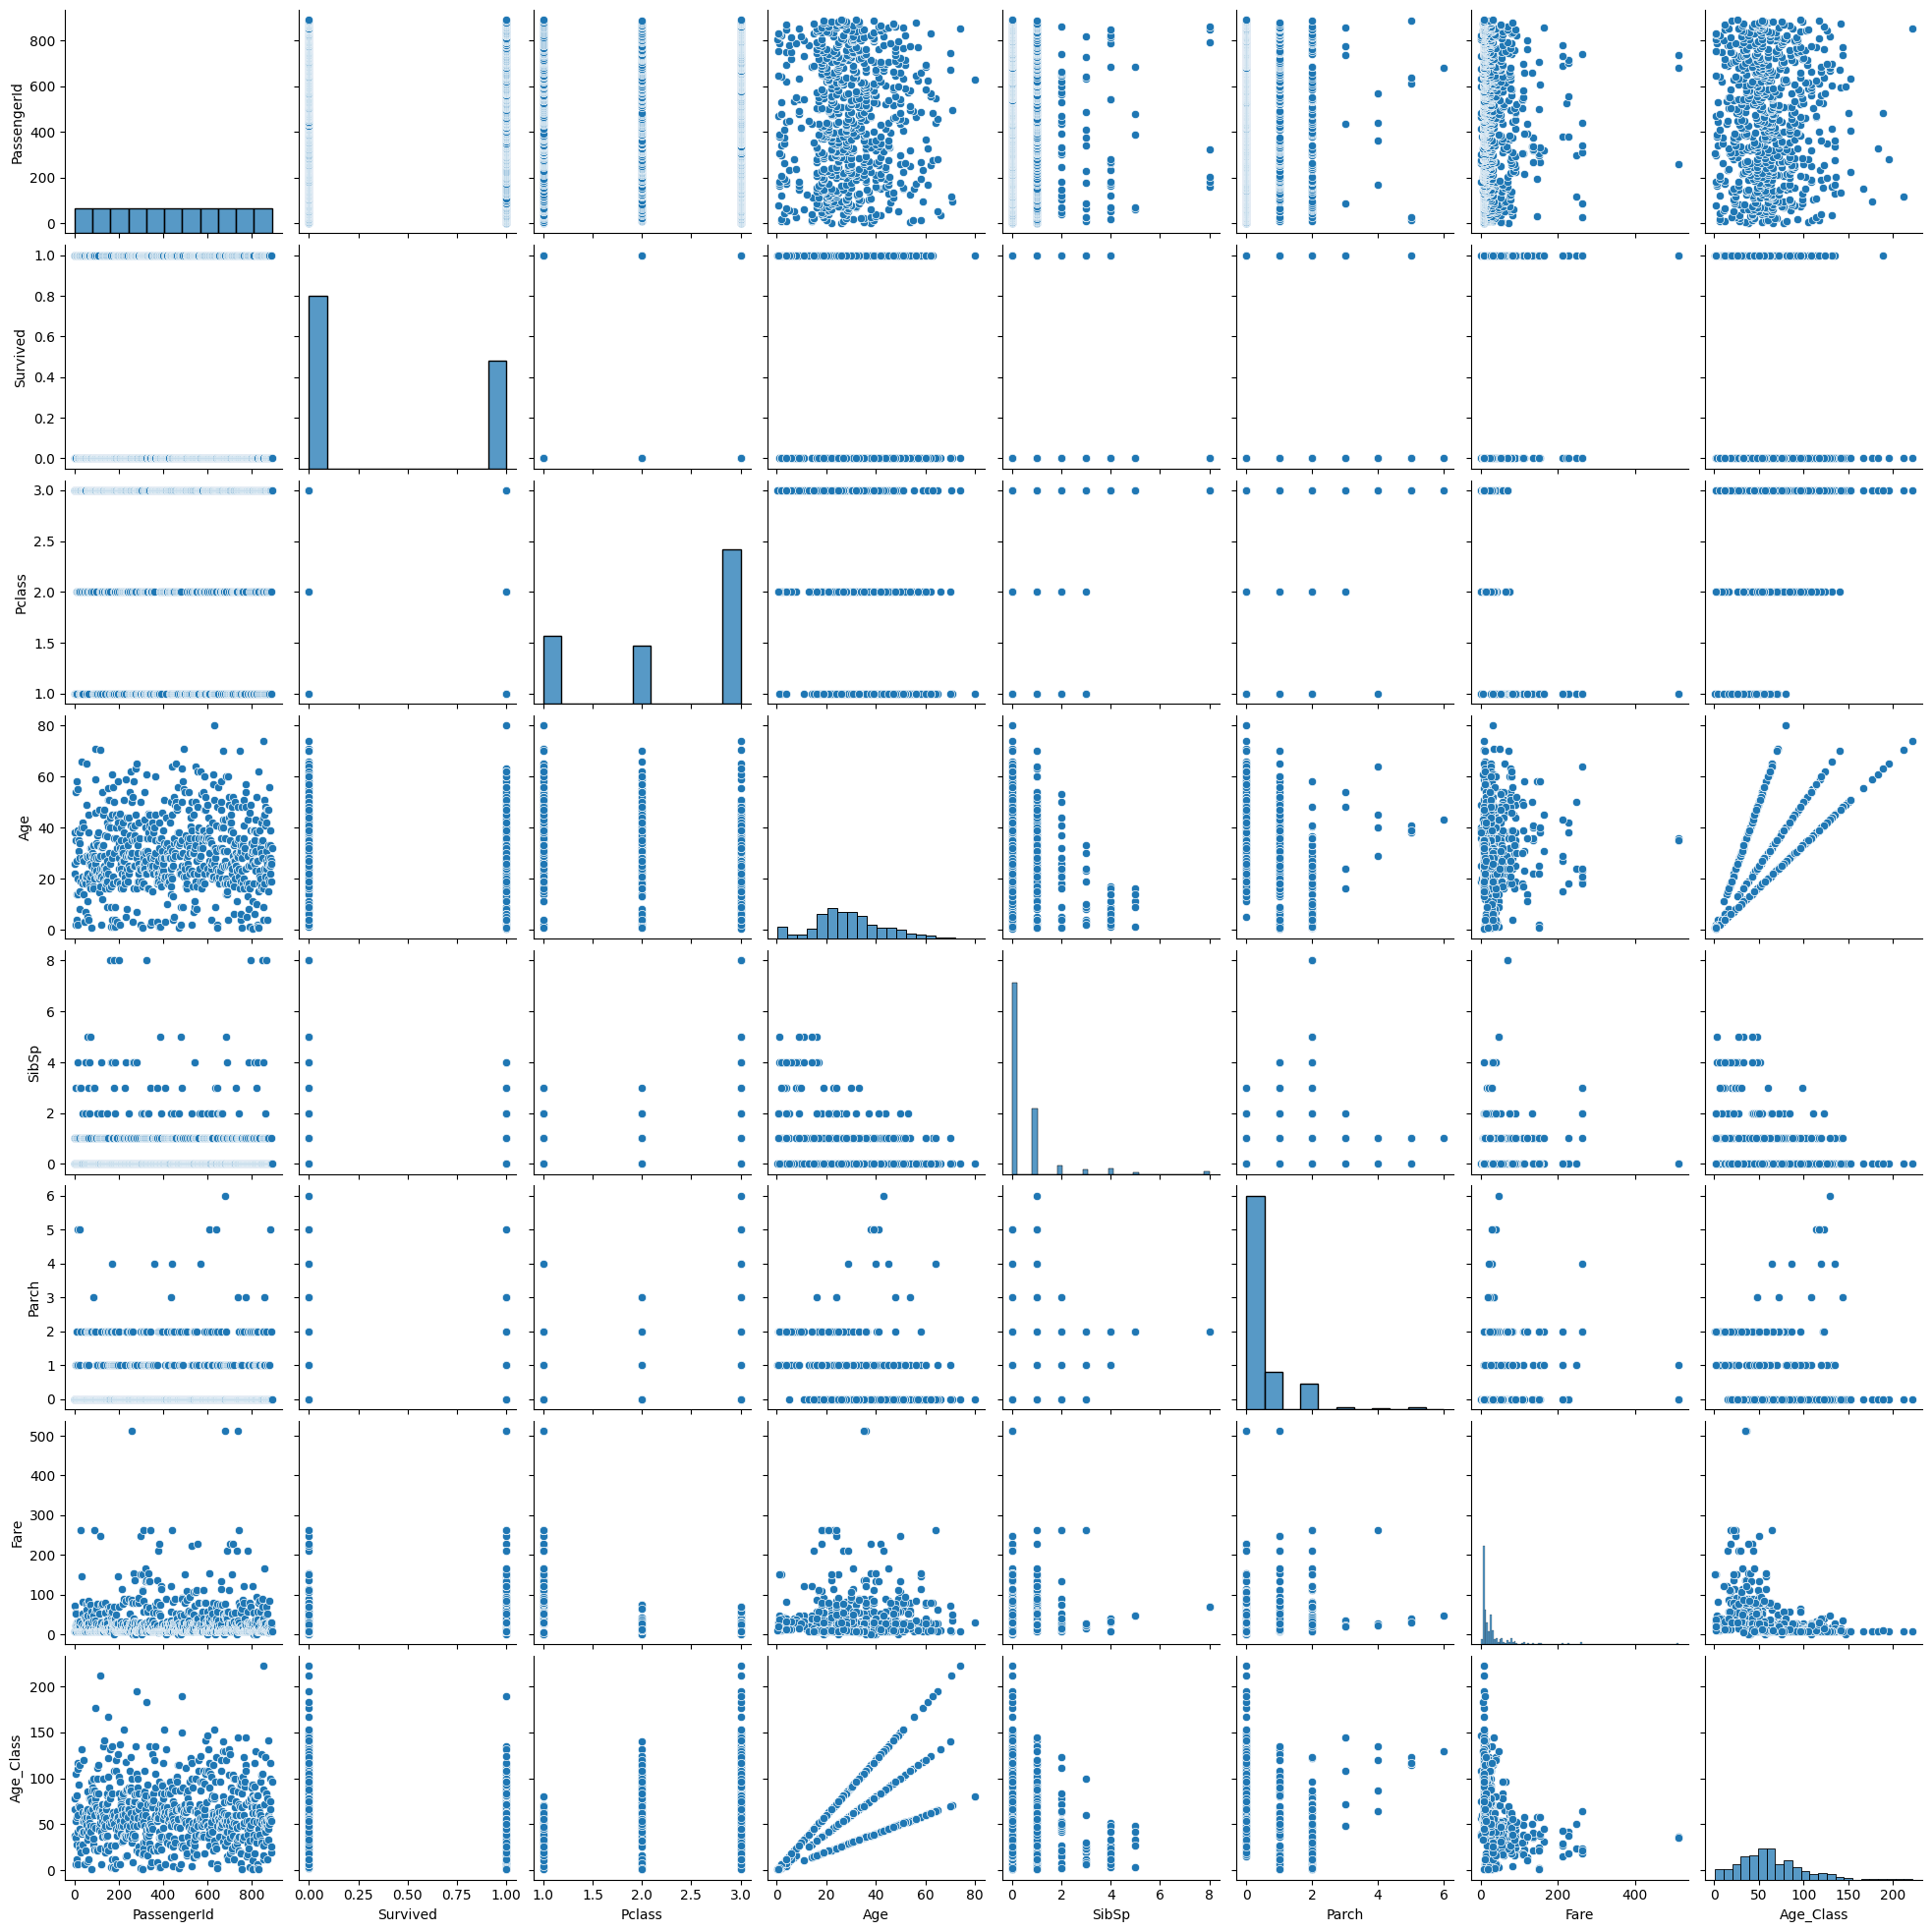

In [ ]:
sns.pairplot(titanic)



> **Survial rate by sex**



In [ ]:
titanic['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [ ]:
titanic['Sex'].unique()

array(['male', 'female'], dtype=object)

In [ ]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


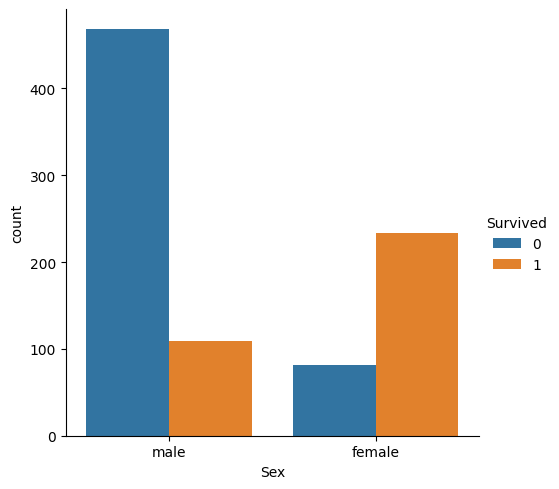

In [ ]:
# Countplot
sns.catplot(x ="Sex", hue ="Survived",
kind ="count", data = titanic)

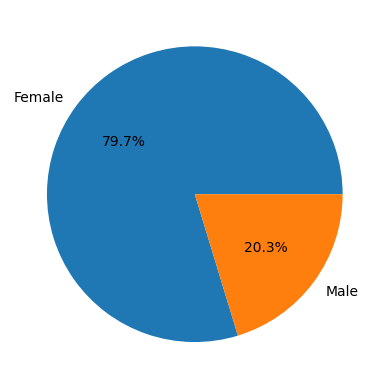

In [ ]:
#survival rate based on gender
Surv_gender= (titanic.groupby("Sex")["Survived"].mean()*100)
plt.pie(Surv_gender, labels=(['Female','Male']),autopct='%1.1f%%')
plt.title="Survival rate based on gender"
plt.show()



> **Age (Continuous Feature) vs Survived**



In [ ]:
#average age of passengers
print("Average passenger age=", round(titanic["Age"].mean(),2))

Average passenger age= 29.7


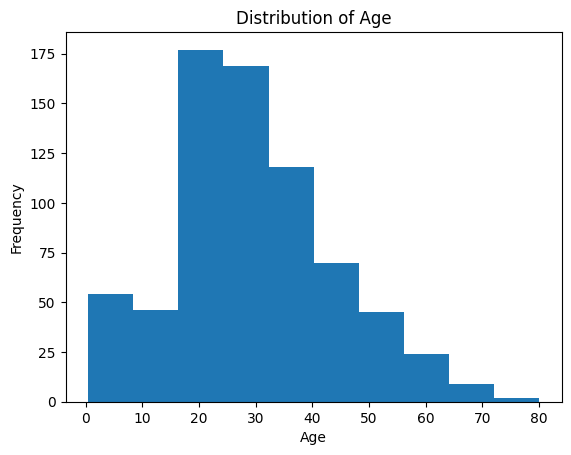

In [ ]:
# Histogram
plt.hist(titanic['Age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

We noticed that highest age group travelling are among the young age between **20-40**. Very few passengers in age group **70-80**

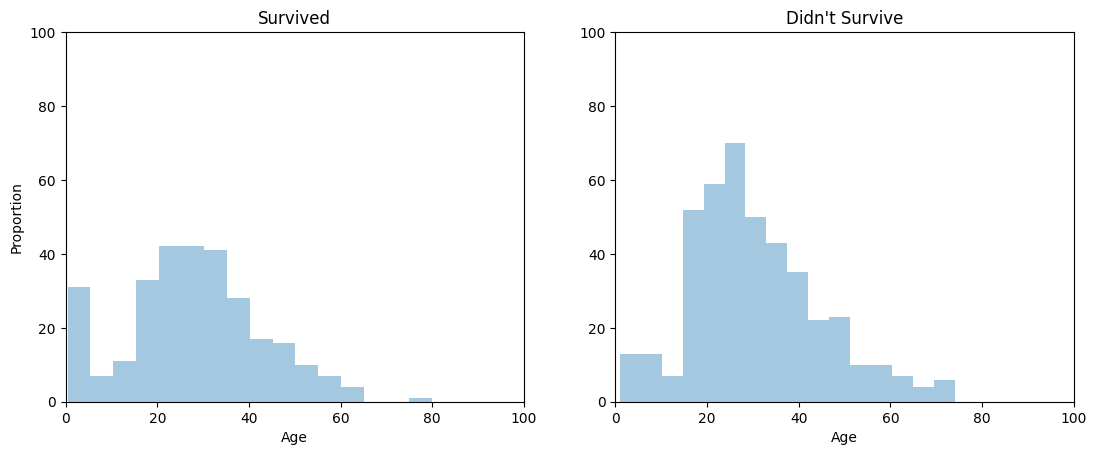

In [ ]:
survived_ages = titanic[titanic.Survived == 1]["Age"]
not_survived_ages = titanic[titanic.Survived == 0]["Age"]
plt.subplot(1, 2, 1)

sns.distplot(survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Survived")
plt.ylabel("Proportion")
plt.subplot(1, 2, 2)

sns.distplot(not_survived_ages, kde=False)
plt.axis([0, 100, 0, 100])
plt.title("Didn't Survive")
plt.subplots_adjust(right=1.7)
plt.show()

<Axes: xlabel='Survived', ylabel='Age'>

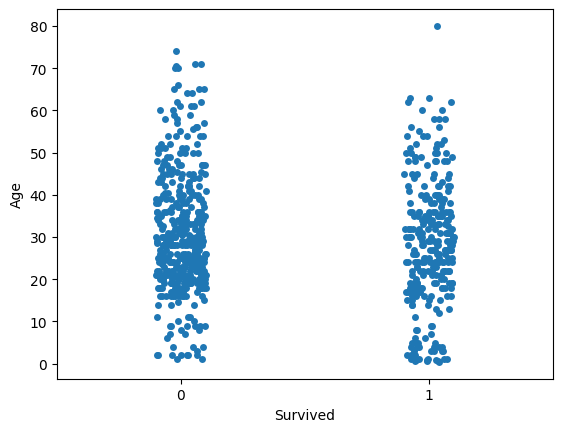

In [ ]:
sns.stripplot(x="Survived", y="Age", data=titanic, jitter=True)

This graph gives a summary of the age range of men, women and children who were saved. The survival rate is –  

* Good for children.
* High for women in the age range 20-50.
* Less for men as the age increases



>**Pclass (Ordinal Feature) vs Survived**



In [ ]:
titanic['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [ ]:
titanic.groupby(['Pclass', 'Survived'])['Survived'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

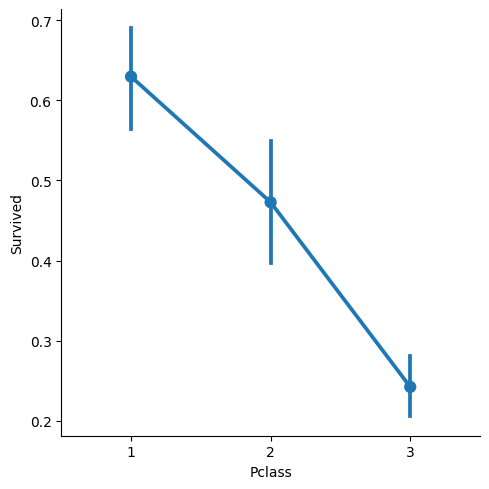

In [ ]:
sns.catplot(x='Pclass', y='Survived', data=titanic, kind='point')

<Axes: xlabel='Pclass', ylabel='Survived'>

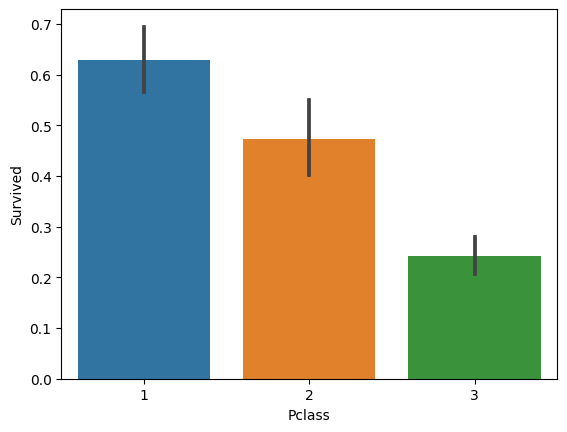

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=titanic)

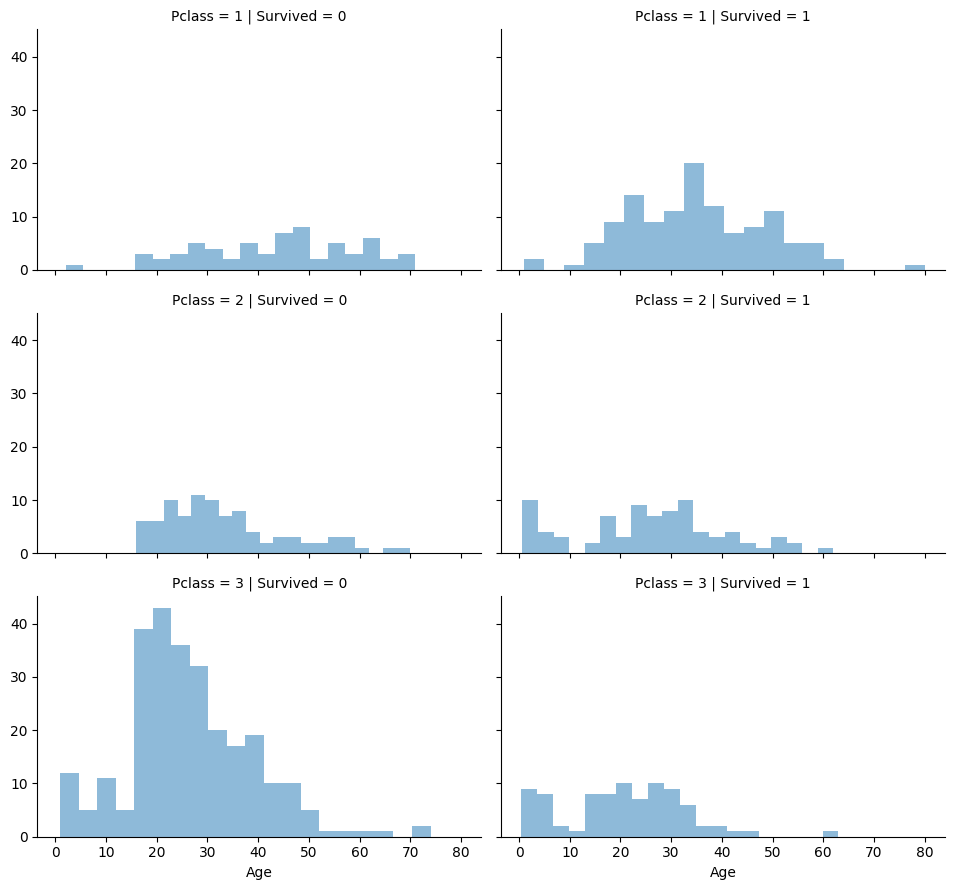

In [ ]:
grid = sns.FacetGrid(titanic, col='Survived', row='Pclass', aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();


<Axes: xlabel='Survived', ylabel='Pclass'>

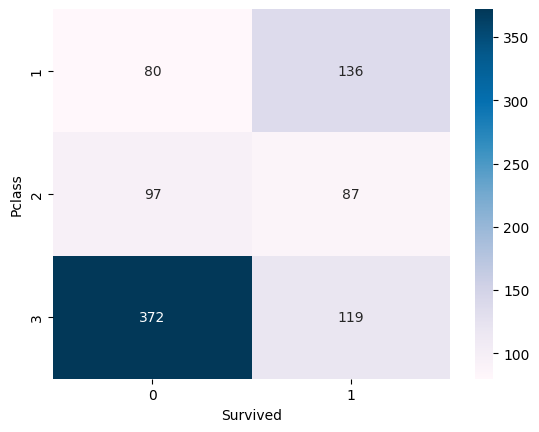

In [ ]:
# Group the dataset by Pclass and Survived and then unstack them
group = titanic.groupby(['Pclass', 'Survived'])
pclass_survived = group.size().unstack()
# Heatmap
sns.heatmap(pclass_survived, annot = True, fmt ="d", cmap = 'PuBu')

If higher-class passengers had more survival rate than the lower class ones or vice versa.

Class 1 passengers have a higher survival chance compared to classes 2 and 3.

It implies that Pclass contributes a lot to a passenger’s survival rate.

In [ ]:
# Cross-tabulation
cross_tab = pd.crosstab(titanic['Pclass'], titanic['Survived'])
print(cross_tab)

Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119




> **SibSp and Parch**



<Axes: ylabel='Frequency'>

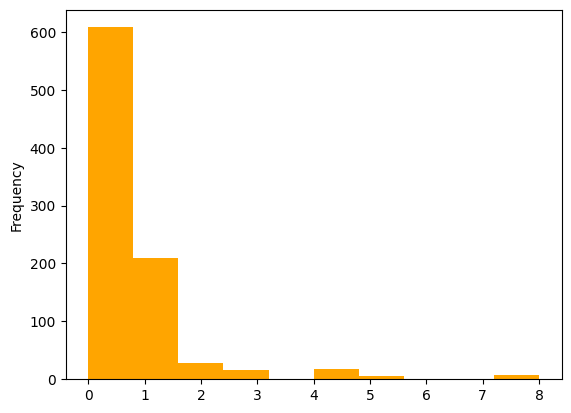

In [ ]:
titanic['SibSp'].plot.hist(color='orange')

<Axes: ylabel='Frequency'>

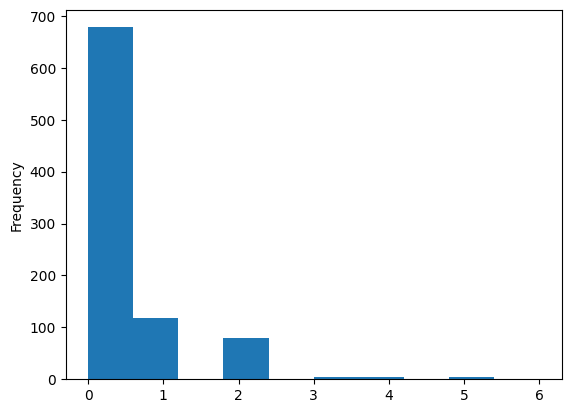

In [ ]:
titanic['Parch'].plot.hist()

<Axes: xlabel='Parch', ylabel='Survived'>

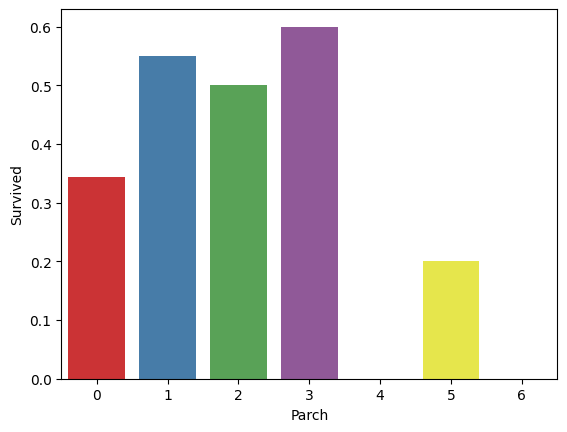

In [ ]:
# parch vs survival
sns.barplot(x='Parch', y='Survived', ci=None, data=titanic, palette='Set1') # ci=None will hide the error bar

In [ ]:
#average number of siblings/spouses aboard the titanic & average number of parents and children
avg_SibSp= titanic["SibSp"].mean()
avg_Parch= titanic["Parch"].mean()
print("Average number of siblings/spouses on the titanic=",avg_SibSp)
print("Average number of parents/children on the titanic=",avg_Parch)

Average number of siblings/spouses on the titanic= 0.5230078563411896
Average number of parents/children on the titanic= 0.38159371492704824


In [ ]:
# Create a pivot table to calculate the survival rate based on the number of siblings/spouses and parents/children
pivot_table = pd.pivot_table(titanic, values='Survived', index=['SibSp', 'Parch'], aggfunc=[np.mean, np.sum])

# Rename the columns
pivot_table.columns = ['Survival Rate', 'Number of Survivors']

# Print the pivot table
print(pivot_table)

             Survival Rate  Number of Survivors
SibSp Parch                                    
0     0           0.303538                  163
      1           0.657895                   25
      2           0.724138                   21
      3           1.000000                    1
      4           0.000000                    0
      5           0.000000                    0
1     0           0.520325                   64
      1           0.596491                   34
      2           0.631579                   12
      3           0.333333                    1
      4           0.000000                    0
      5           0.333333                    1
      6           0.000000                    0
2     0           0.250000                    4
      1           0.857143                    6
      2           0.500000                    2
      3           1.000000                    1
3     0           1.000000                    2
      1           0.000000              

In [ ]:
#siblings/spouses & parents/children based on gender and ticket class
print("correlation:")
print(titanic.groupby(["Sex","Pclass"])[["SibSp","Parch"]].mean())

correlation:
                  SibSp     Parch
Sex    Pclass                    
female 1       0.553191  0.457447
       2       0.486842  0.605263
       3       0.895833  0.798611
male   1       0.311475  0.278689
       2       0.342593  0.222222
       3       0.498559  0.224784


In [ ]:
df = [titanic]
for dataset in df:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
titanic['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

<Axes: xlabel='Parch', ylabel='SibSp'>

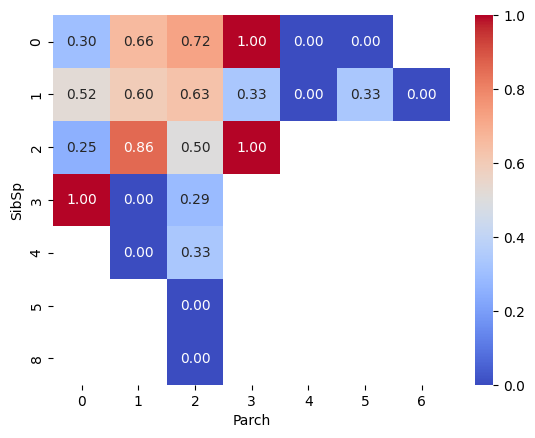

In [ ]:
# Representing in a heatmap
# Calculate the survival rate based on SibSp and Parch
sibsp_parch = titanic.groupby(['SibSp', 'Parch'])['Survived'].mean().reset_index()

# Create a pivot table to reshape the data for heat map plotting
sibsp_parch_pivot = sibsp_parch.pivot(index='SibSp', columns='Parch', values='Survived')

# Plot the heat map
sns.heatmap(sibsp_parch_pivot, cmap='coolwarm', annot=True, fmt='.2f')



>**Fare (Continuous Feature) vs Survived**






<Axes: title={'center': 'Histogram for Fare_Range'}, ylabel='Frequency'>

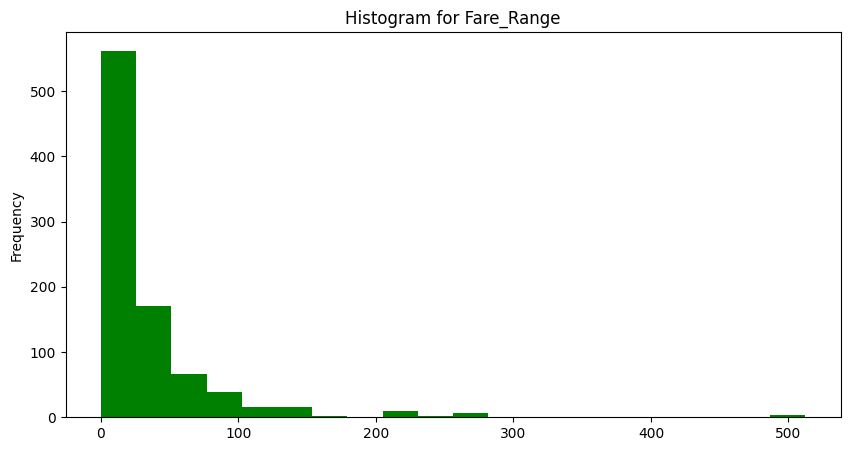

In [ ]:
#histogram
titanic['Fare'].plot.hist(bins=20, figsize=(10,5), color='green', title = 'Histogram for Fare_Range')

We observe that most of the tickets bought are under fare 100 and Very few are on the higher side of fare i.e. 220-500 range

<Axes: xlabel='Fare_Range', ylabel='Survived'>

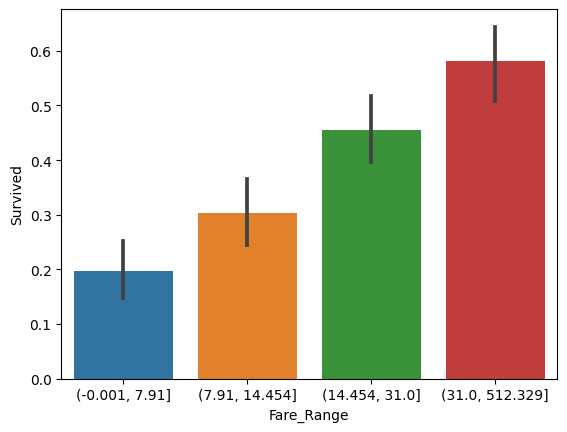

In [ ]:
titanic['Fare_Range'] = pd.qcut(titanic['Fare'], 4)
# Barplot - Shows approximate values based on the height of bars.
sns.barplot(x ='Fare_Range', y ='Survived', data = titanic)

**Fare** denotes the fare paid by a passenger. As the values in this column are continuous, they need to be put in separate bins(as done for **Age** feature) to get a clear idea. It can be concluded that if a passenger paid a higher fare, the survival rate is more.

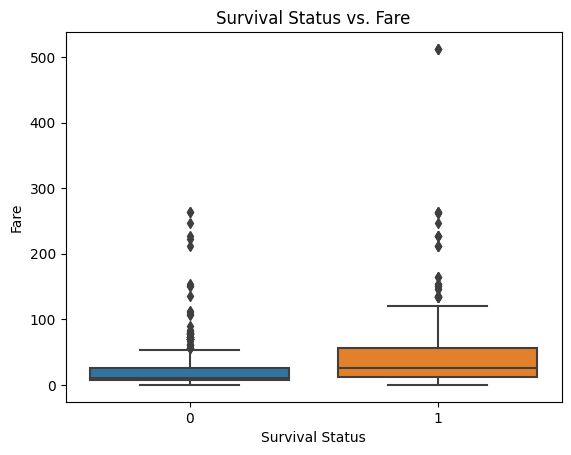

In [ ]:
sns.boxplot(x=titanic['Survived'], y=titanic['Fare'])
plt.xlabel('Survival Status')
plt.ylabel('Fare')
plt.title('Survival Status vs. Fare')
plt.show()

In [ ]:
# Correlation analysis
correlation = titanic[['Age', 'Fare']].corr()
print(correlation)

           Age      Fare
Age   1.000000  0.096067
Fare  0.096067  1.000000




> **Categorical Count Plots for Embarked Feature**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  # Check for categorical plots without order information
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  "plot.".format(func.__name__))


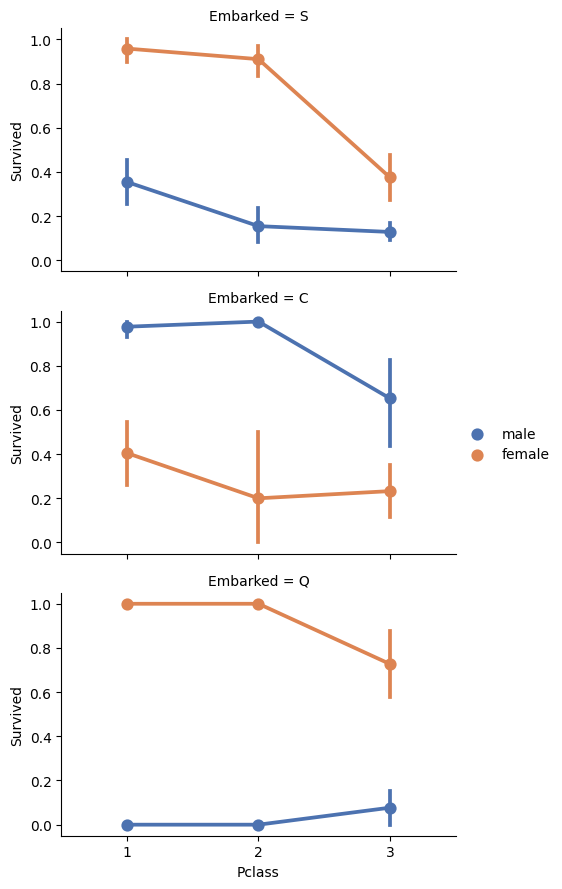

In [ ]:
grid  = sns.FacetGrid(titanic, row='Embarked', aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()



> **Embarked vs Survived**



In [ ]:
#survival rate for each port departure
print("Survival rate for each port departure:")
print(titanic.groupby("Embarked")["Survived"].mean())

Survival rate for each port departure:
Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


<Axes: xlabel='Embarked', ylabel='Survived'>

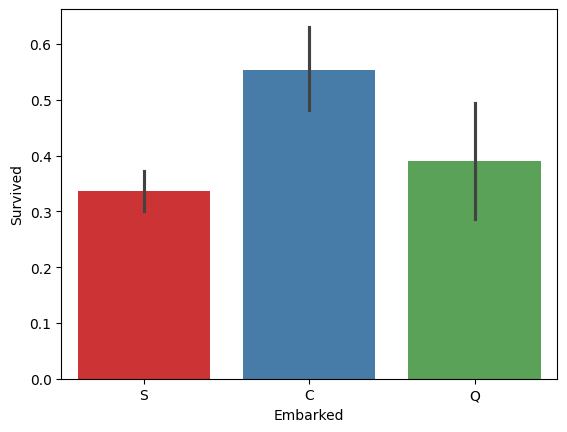

In [ ]:
# Embarked vs Survival
sns.barplot(x='Embarked', y='Survived', data=titanic, palette='Set1')

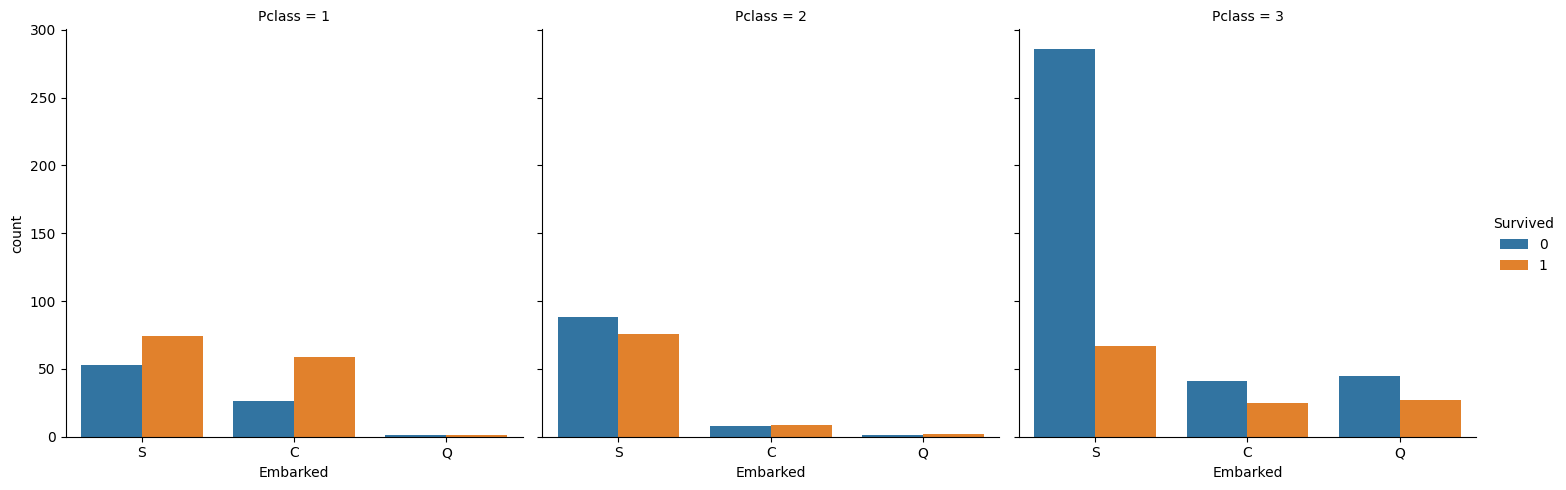

In [ ]:
# Countplot
sns.catplot(x ='Embarked', hue ='Survived', kind ='count', col ='Pclass', data = titanic)

Some notable observations are:

* Majority of the passengers boarded from S. So, the missing values can be filled with S.
* Majority of class 3 passengers boarded from Q.
* S looks lucky for class 1 and 2 passengers compared to class 3.



>**Examine Cabin Data**



In [ ]:
import re

# Extract the first letter of each cabin value to get the deck level
deck = titanic['Cabin'].apply(lambda x: re.findall("([A-Za-z]+)", str(x))[0][0])

# Create a new column for the deck level
titanic['Deck'] = deck

In [ ]:
# Calculate survival rates by deck
deck_survival = titanic.groupby(['Deck'])['Survived'].mean()

print(deck_survival)

Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
n    0.299854
Name: Survived, dtype: float64


<Axes: xlabel='Deck', ylabel='Survived'>

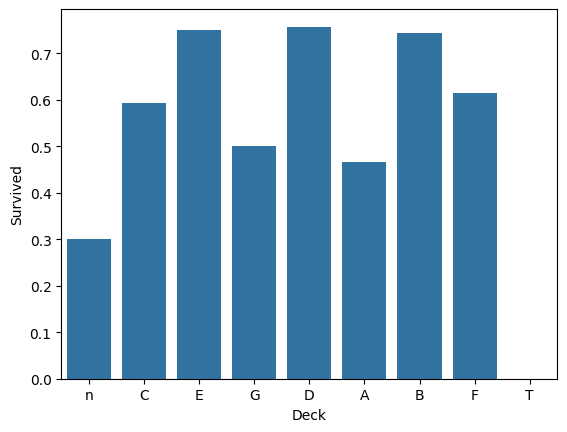

In [ ]:
# Plot the survival rates by deck as a bar chart
sns.barplot(x='Deck', y='Survived', data=titanic, ci=None)

<Axes: xlabel='Pclass', ylabel='count'>

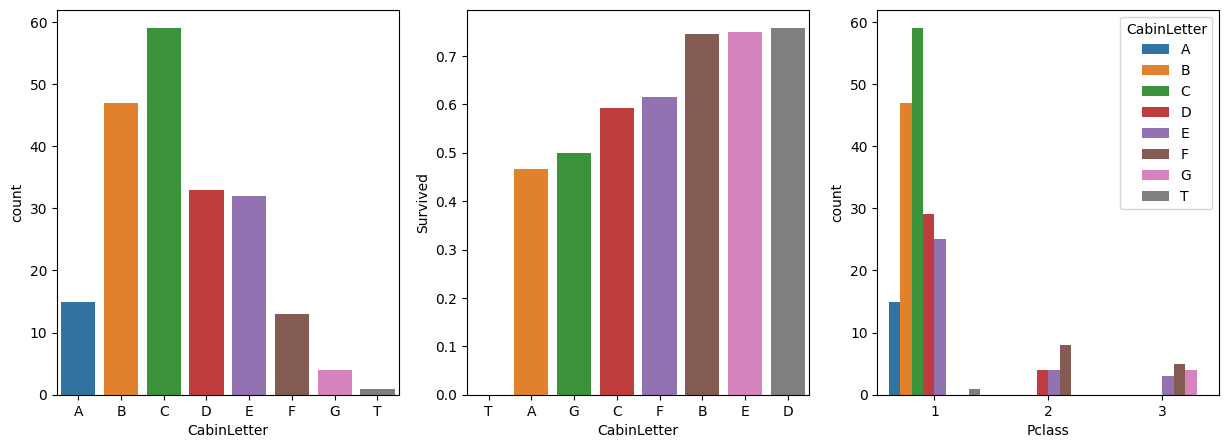

In [ ]:
# Create a new column CabinLetter which is the first character of the Cabin string

titanic['CabinLetter'] = titanic['Cabin'].str[0]

plot_df = titanic[titanic['CabinLetter'].notnull()]

# Visualisation
fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(15,5))

# Plot count of port of Embarkation
sns.countplot(x='CabinLetter', data=plot_df.sort_values(by='CabinLetter'), ax=axis1)

# Group by CabinLetter, and get the mean for survived passengers for each value in CabinLetter
cabin_perc = plot_df[['CabinLetter', 'Survived']].groupby(['CabinLetter'],as_index=False).mean()
sns.barplot(x='CabinLetter', y='Survived', data=cabin_perc.sort_values(by='Survived'),ax=axis2)

# Plot count of CabinLetter by Passenger Class
sns.countplot(x='Pclass', hue='CabinLetter', data=plot_df.sort_values(by='CabinLetter'), ax=axis3)



>**Family_Size (Count Feature) vs Survived**



<Axes: xlabel='Family_Size', ylabel='Survived'>

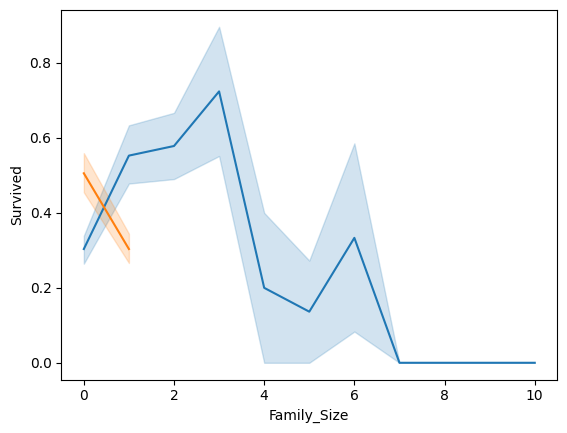

In [ ]:
# Adding a column Family_Size
titanic['Family_Size'] = 0
titanic['Family_Size'] = titanic['Parch']+titanic['SibSp']

# Adding a column Alone
titanic['Alone'] = 0
titanic.loc[titanic.Family_Size == 0, 'Alone'] = 1

# Factorplot for Family_Size
sns.lineplot(x ='Family_Size', y ='Survived', data = titanic)

# Factorplot for Alone
sns.lineplot(x ='Alone', y ='Survived', data = titanic)

Important observations –

* If a passenger is alone, the survival rate is less.
* If the family size is greater than 5, chances of survival decrease considerably.

**CORRELATION STUDY**

In [ ]:
corrmat = titanic.corr()
corrmat


<ipython-input-62-987f063aff7f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = titanic.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Family_Size,Alone,relatives,not_alone
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,-0.040143,0.057462,-0.040143,0.057462
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,0.016639,-0.203367,0.016639,-0.203367
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.065997,0.135207,0.065997,0.135207
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,-0.301914,0.198270,-0.301914,0.198270
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,0.890712,-0.584471,0.890712,-0.584471
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,0.783111,-0.583398,0.783111,-0.583398
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.217138,-0.271832,0.217138,-0.271832
Family_Size,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,-0.690922,1.000000,-0.690922
Alone,0.057462,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,-0.690922,1.000000,-0.690922,1.000000
relatives,-0.040143,0.016639,0.065997,-0.301914,0.890712,0.783111,0.217138,1.000000,-0.690922,1.000000,-0.690922


<ipython-input-63-f52b02670e66>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(titanic.corr(), cmap=colormap, annot=True, linewidths=0.2)


<Axes: >

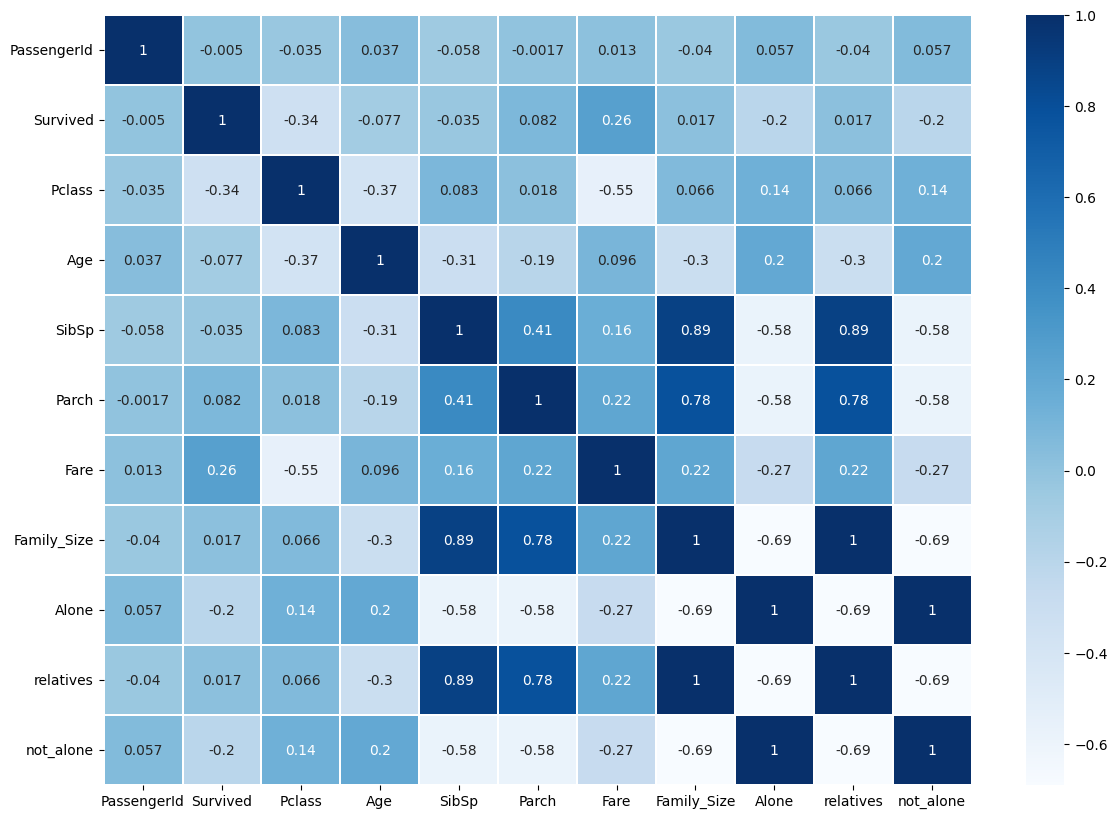

In [ ]:
colormap = plt.cm.Blues
plt.figure(figsize=(14,10))
sns.heatmap(titanic.corr(), cmap=colormap, annot=True, linewidths=0.2)

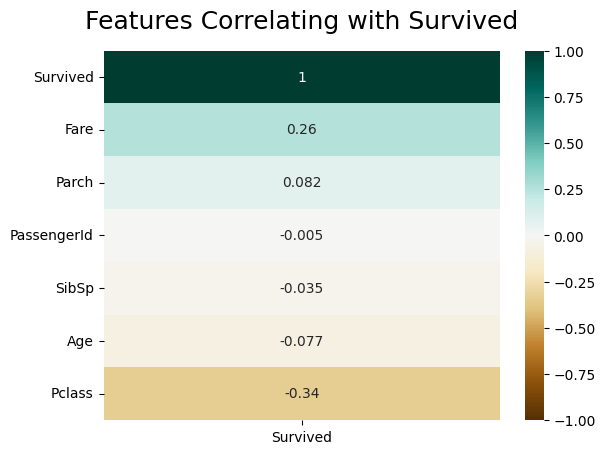

In [ ]:
heatmap = sns.heatmap(titanic.corr()[['Survived']].sort_values(by='Survived', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Survived', fontdict={'fontsize':18}, pad=16);

* Sex is positively corrlated with Survived (with a Person’s correlation coefficient of 0.54) ; Female is more likely to survive
* Pclass is negatively correlated with Survived(with a Pearson’s correlation coefficient of -0.34) ; Obviously, better the ticket class (1 = 1st/Upper ; 2 = 2nd/Middle; 3 = 3rd/Lower), higher the chance of survival.
* Those important feature for prediction the Survived people

#Target Variable Analysis **(Univariate Analysis)**

In [ ]:
titanic.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

only 38% of the passengers were survived, where as a majority 61% the passenger did not survive the disaster

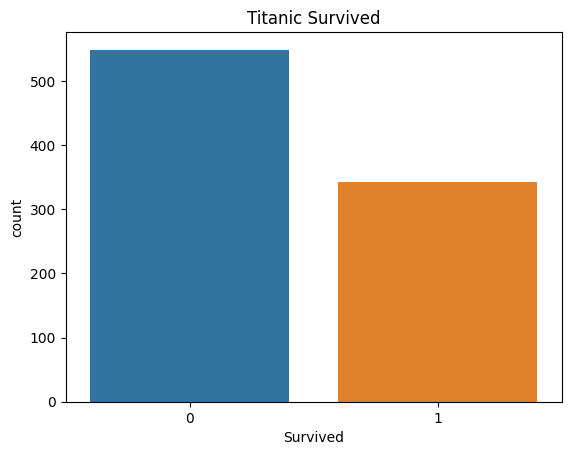

In [ ]:
sns.countplot(x='Survived', data=titanic)
plt.title("Titanic Survived")
plt.show()

<Axes: ylabel='Survived'>

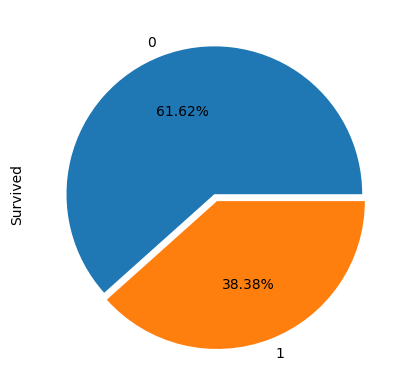

In [ ]:
explode = [0, 0.05]
titanic['Survived'].value_counts().plot.pie(autopct = '%1.2f%%', explode=explode)

> **Visualize Using Countplots**



<Axes: xlabel='Survived', ylabel='count'>

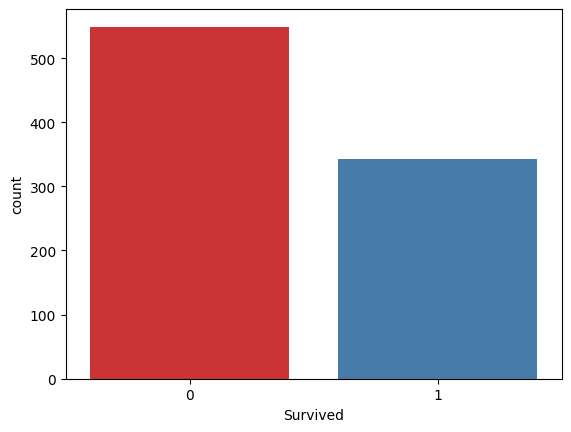

In [ ]:
sns.countplot(x='Survived', data=titanic, palette='Set1')

<Axes: xlabel='Pclass', ylabel='count'>

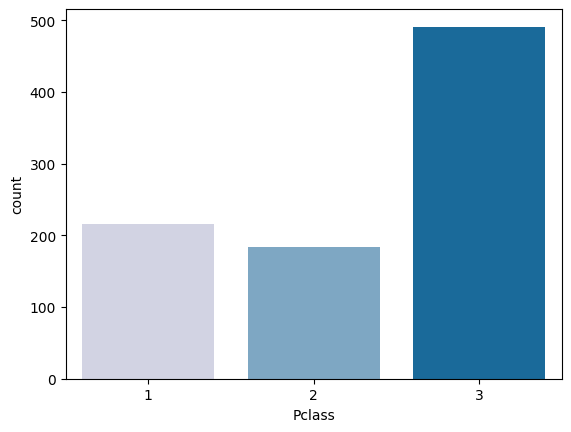

In [ ]:
sns.countplot(x="Pclass", data=titanic, palette='PuBu')

<Axes: xlabel='Survived', ylabel='count'>

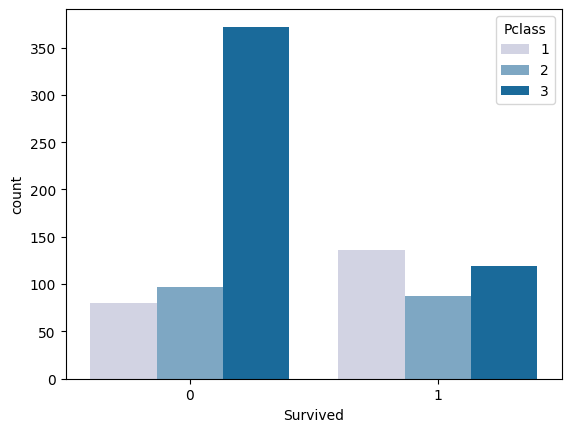

In [ ]:
#Let's visualize the count of survivals with respect to Pclass
sns.countplot(x=titanic['Survived'], hue=titanic['Pclass'], palette = 'PuBu')

* The person who did not survived belongs to 3rd class
* 1st class passengers are more likely to survive

<Axes: xlabel='Sex', ylabel='count'>

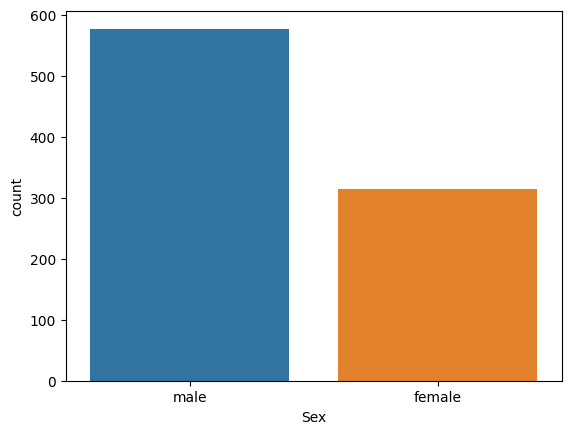

In [ ]:
sns.countplot(x="Sex", data=titanic)

<Axes: xlabel='Sex', ylabel='count'>

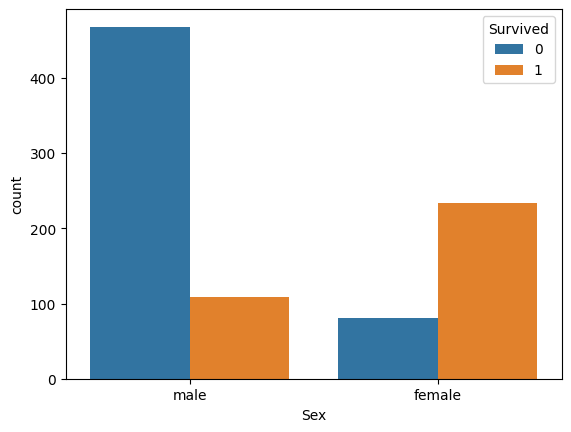

In [ ]:
#Let's visualize the count of survivals with respect to gender
sns.countplot(x=titanic['Sex'], hue=titanic['Survived'])

    0 represents not survived
    1 represents survived

Just by observing the graph, it can be approximated that the survival rate of men is around 20% and that of women is around 75%.

Therefore, whether a passenger is a male or a female plays an important role in determining if one is going to survive.

<Axes: xlabel='SibSp', ylabel='count'>

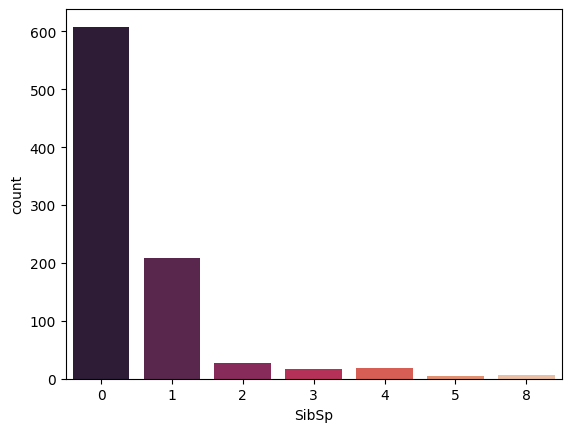

In [ ]:
sns.countplot(x = 'SibSp', data = titanic, palette='rocket')

We notice that most of the passengers do not have their siblings abroad.

<Axes: xlabel='SibSp', ylabel='count'>

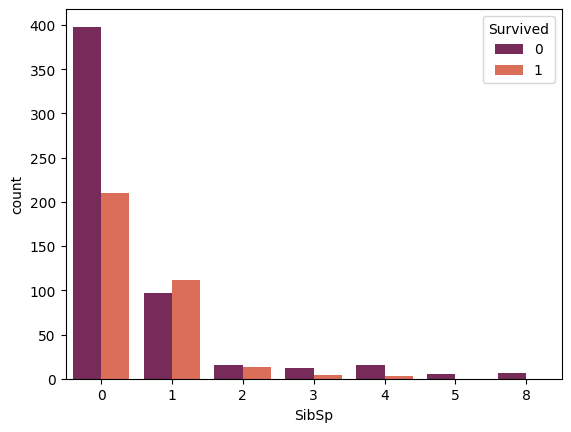

In [ ]:
#Let's visualize the count of survivals with respect to SibSp
sns.countplot(x=titanic['SibSp'], hue=titanic['Survived'], palette='rocket')

<Axes: xlabel='Parch', ylabel='count'>

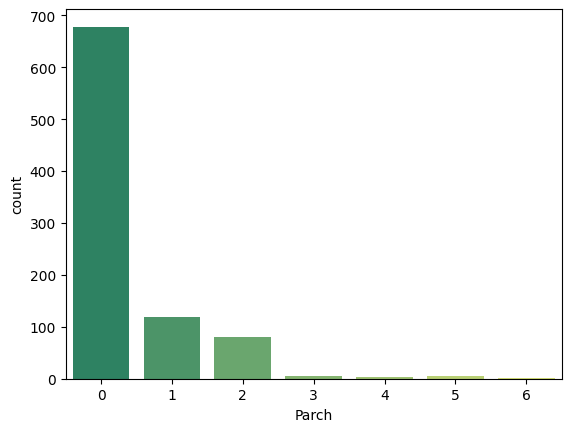

In [ ]:
sns.countplot(x="Parch", data=titanic, palette='summer')

No. of Parents and Siblings who abroad the ship are less

<Axes: xlabel='Parch', ylabel='count'>

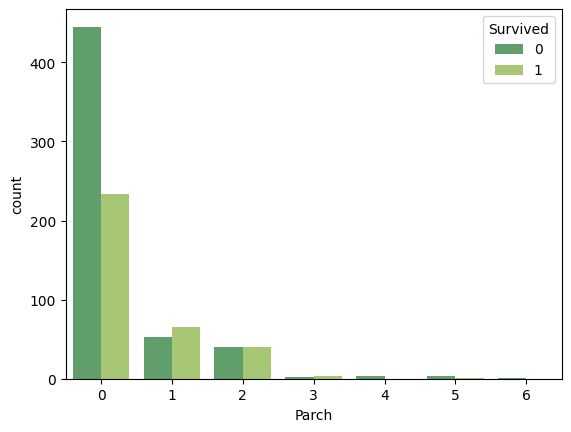

In [ ]:
#Let's visualize the count of survivals with respect to Parch
sns.countplot(x=titanic['Parch'], hue=titanic['Survived'], palette='summer')

<Axes: xlabel='Embarked', ylabel='count'>

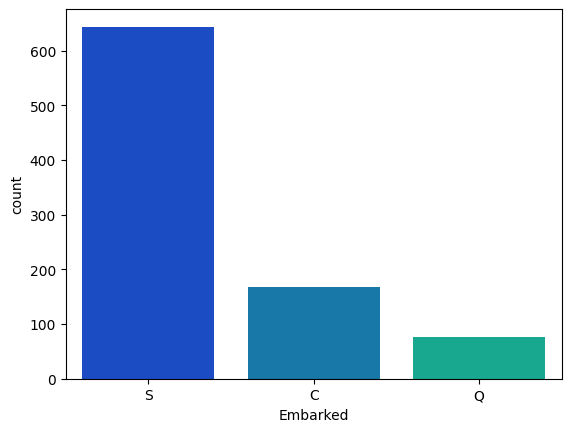

In [ ]:
sns.countplot(x='Embarked', data=titanic, palette='winter')

<Axes: xlabel='Embarked', ylabel='count'>

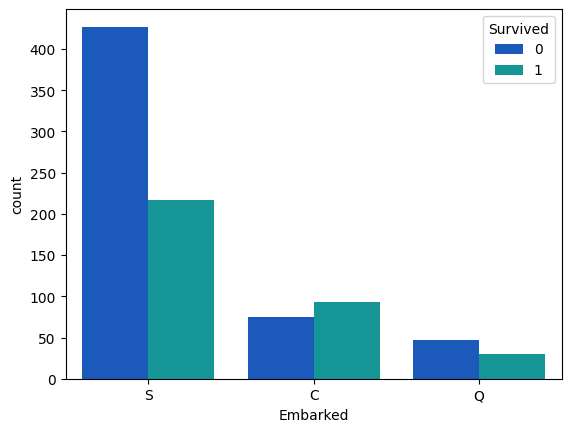

In [ ]:
#Let's visualize the count of survivals with respect to Embarked
sns.countplot(x=titanic['Embarked'], hue=titanic['Survived'], palette='winter')



> **Visualizing in distplots**



<Axes: xlabel='Fare', ylabel='Density'>

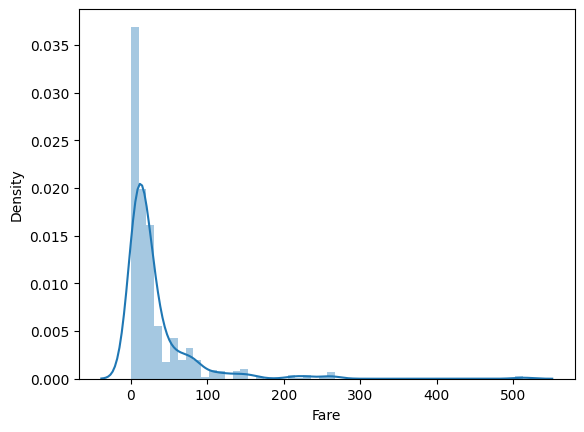

In [ ]:
sns.distplot(titanic['Fare'])

<Axes: xlabel='Age', ylabel='Density'>

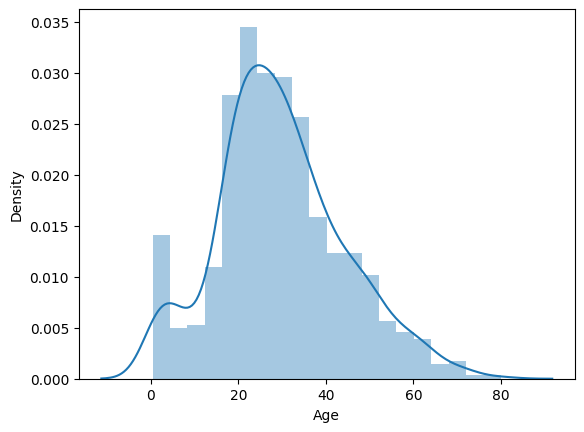

In [ ]:
sns.distplot(titanic['Age'].dropna(),kde=True)

<Axes: xlabel='Survived', ylabel='Fare'>

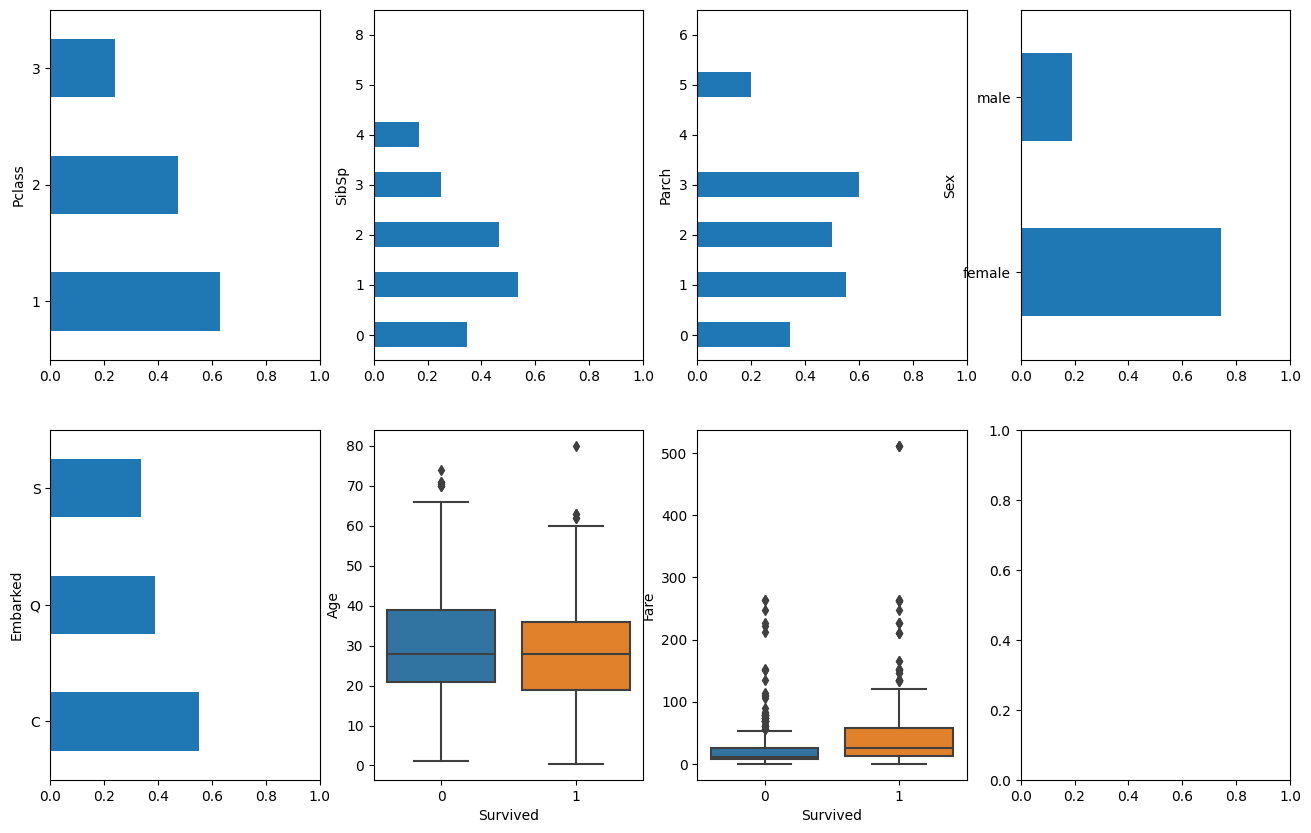

In [ ]:
figbi, axesbi = plt.subplots(2, 4, figsize=(16, 10))
titanic.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
titanic.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
titanic.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
titanic.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
titanic.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=titanic, ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=titanic, ax=axesbi[1,2])

#Bivariate Analysis



> **Pclass and Sex**



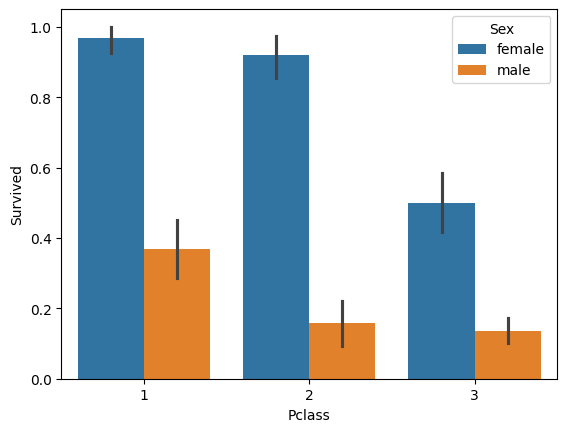

In [ ]:
#survival based on passenger class and gender
sns.barplot(x="Pclass",y="Survived",hue="Sex",data=titanic)
plt.title="Survival rate based on class and gender"
plt.show()



> **Pclass vs Age**

<Axes: xlabel='Pclass', ylabel='Age'>

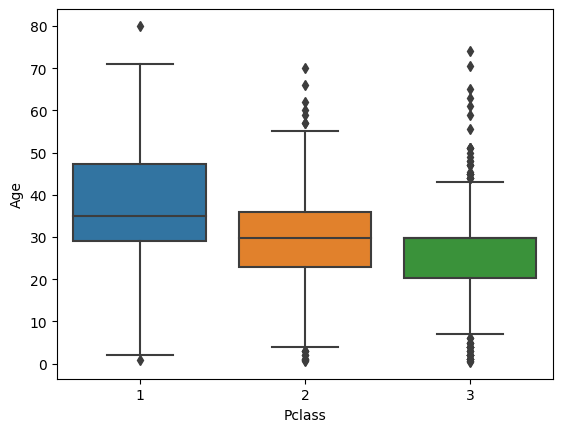

In [ ]:
sns.boxplot(x='Pclass', y='Age', data=titanic)

We can observe that older age group are travelling more in class 1 and 2 when compared to class 3



>**Sex vs Age**



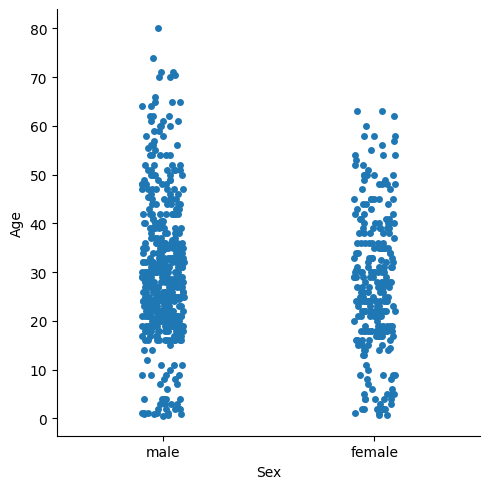

In [ ]:
sns.catplot(x='Sex', y='Age', data=titanic)

<Axes: xlabel='Sex', ylabel='Age'>

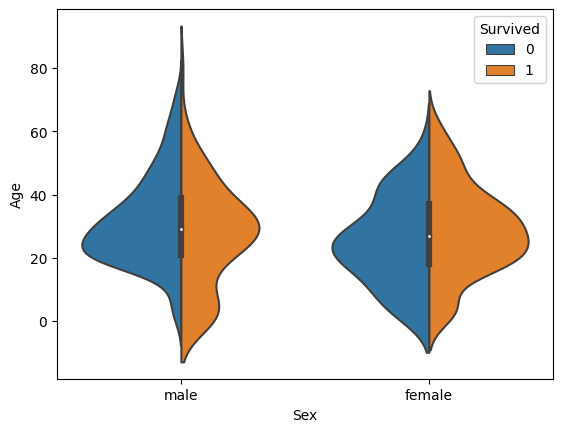

In [ ]:
# Violinplot Displays distribution of data
# across all levels of a category.
sns.violinplot(x ="Sex", y ="Age", hue ="Survived", data = titanic, split = True)

Survival rate based on age and sex distribution:
Sex     Age     
female  (0, 18]     0.676471
        (18, 30]    0.755556
        (30, 50]    0.779070
        (50, 80]    0.941176
male    (0, 18]     0.338028
        (18, 30]    0.155556
        (30, 50]    0.225806
        (50, 80]    0.127660
Name: Survived, dtype: float64


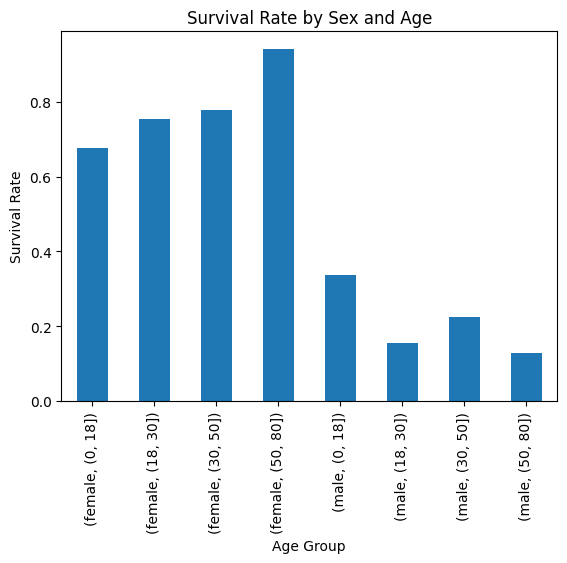

In [ ]:
#survival rate based on age and sex

# Drop rows where the Age column is missing
titanic_age = titanic.dropna(subset=["Age"])
print("Survival rate based on age and sex distribution:")
survival_age= titanic_age.groupby(["Sex", pd.cut(titanic_age.Age, [0, 18, 30, 50, 80])])["Survived"].mean()
print(survival_age)
ax = survival_age.plot(kind="bar", stacked=True)
ax.set_title("Survival Rate by Sex and Age")
ax.set_xlabel("Age Group")
ax.set_ylabel("Survival Rate")
plt.show()



> **Sex vs Fare**



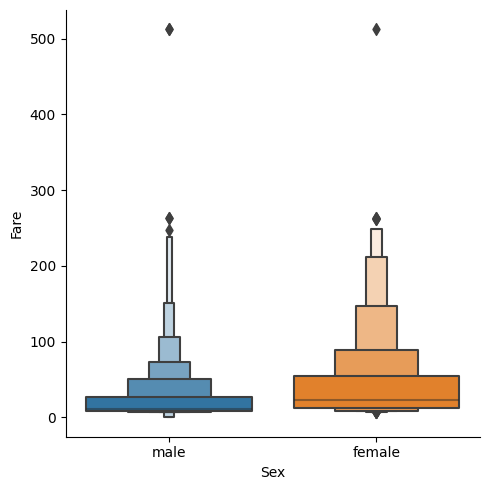

In [ ]:
sns.catplot(x='Sex', y='Fare', data=titanic, kind='boxen')



> **Age vs Fare**



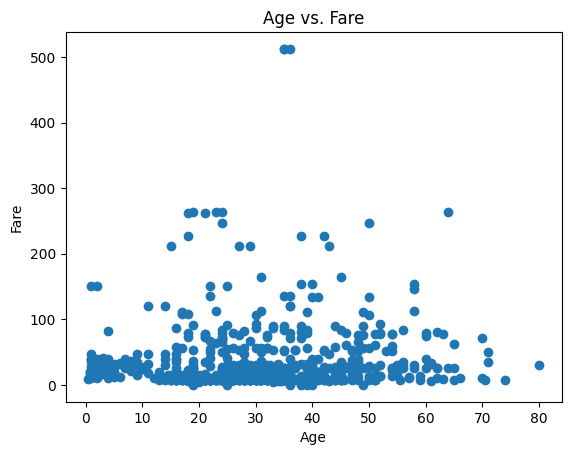

In [ ]:
# Scatter plot
plt.scatter(titanic['Age'], titanic['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs. Fare')
plt.show()



> **Pclass and Fare**



In [ ]:
#average fare paid by different classes of passengers
print("Average fare paid by passengers from each class:")
print(titanic.groupby("Pclass")["Fare"].mean())

Average fare paid by passengers from each class:
Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64




>**Joint Plots(continous vs continous)**


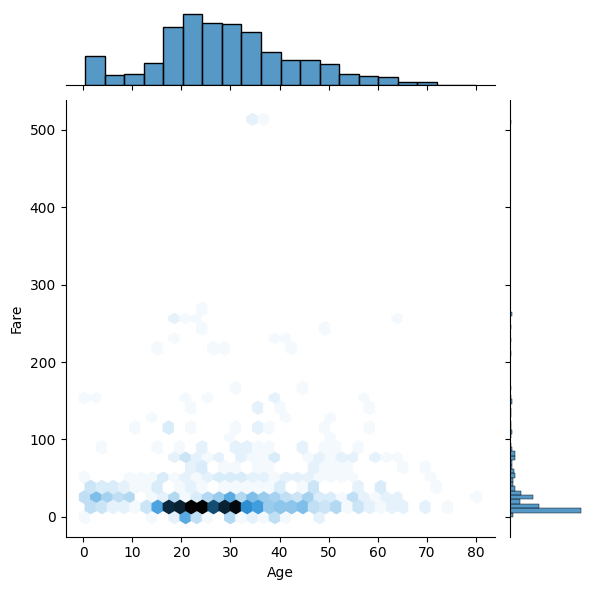

In [ ]:
sns.jointplot(x="Age", y="Fare", data=titanic, kind='hex')

The average passengers were aged between 20 and 40, the average Fare is about **20** to **50**

#Multivariate Analysis

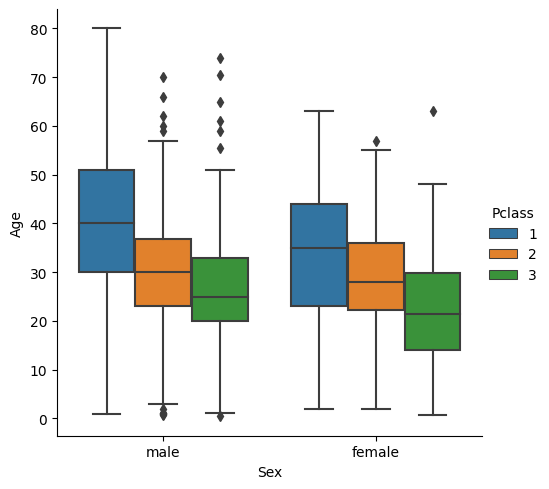

In [ ]:
#third parameter Pclass is included
sns.catplot(x='Sex', y='Age', data=titanic, kind='box', hue='Pclass')

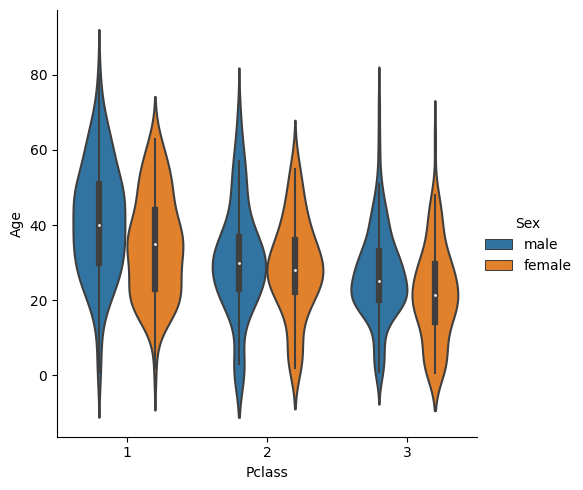

In [ ]:
sns.catplot(x='Pclass', y='Age', data=titanic, kind='violin', hue='Sex')

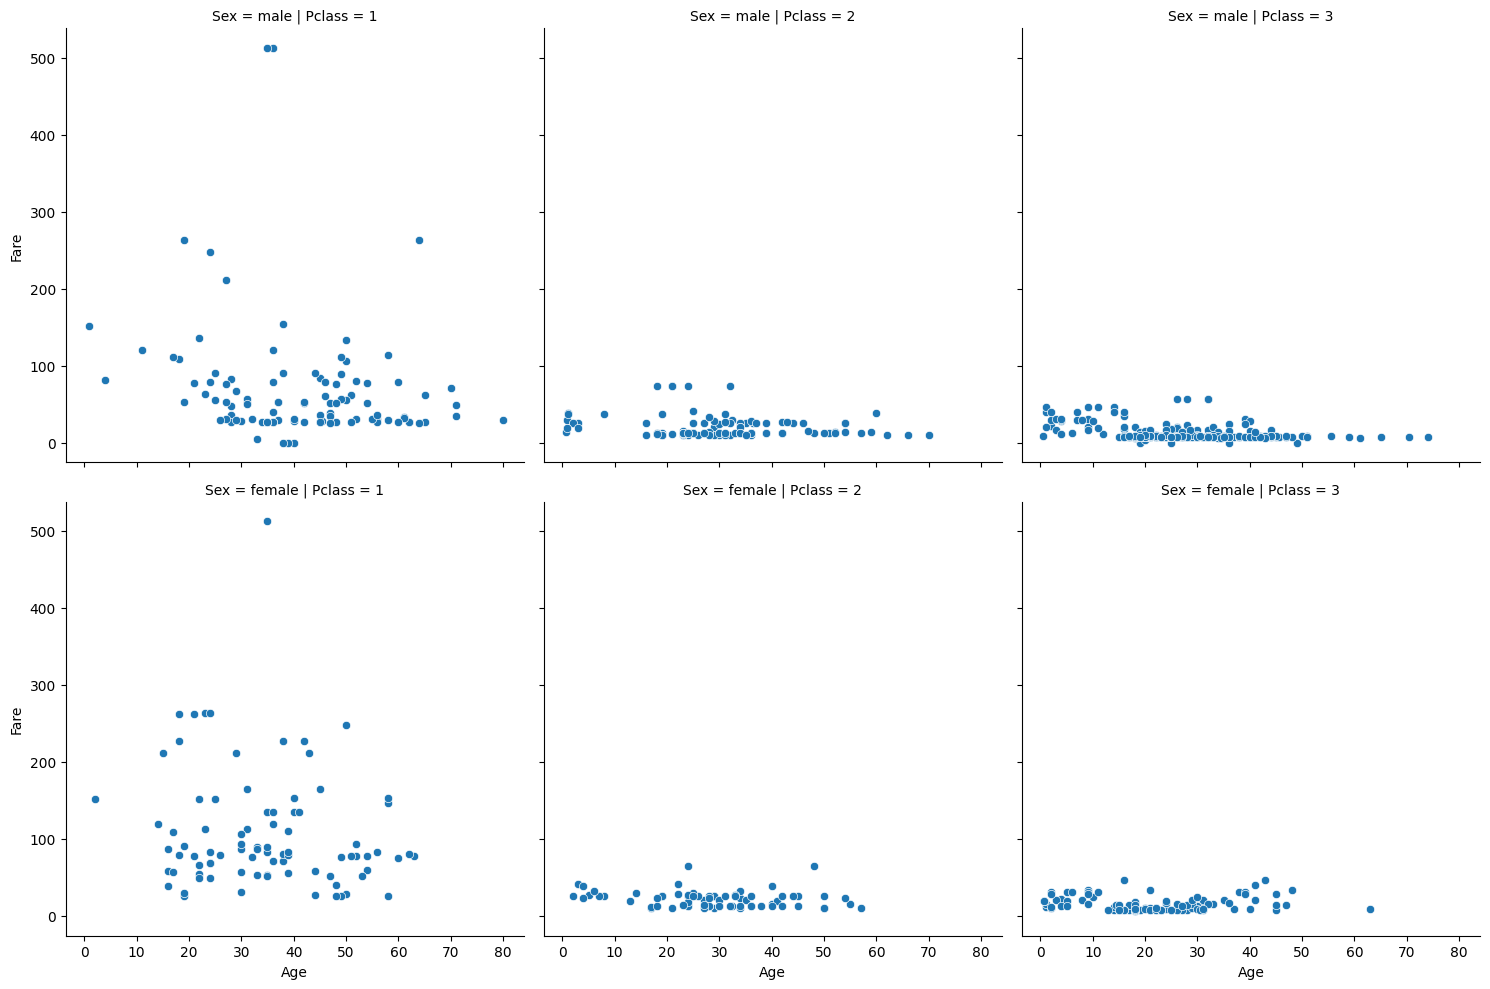

In [ ]:
sns.relplot(x='Age', y='Fare', data=titanic, row='Sex', col='Pclass')


*There were more male passengers who traveled in first-class than women passengers.*

*The Fare for first-class female passengers was higher than male passengers.*

*There is no big difference in Fare for second and third-class passengers.*

*Very few children traveled in first class. The third class had more children.*

*Most of the second and third-class passengers were aged between 20 and 40*

> **Construct a Coorelation matrix of the int64 and float64 feature types**


* There is a positve coorelation between Fare and Survived and a negative coorelation between Pclass and Surived

* There is a negative coorelation between Fare and Pclass, Age and Plcass

<Axes: >

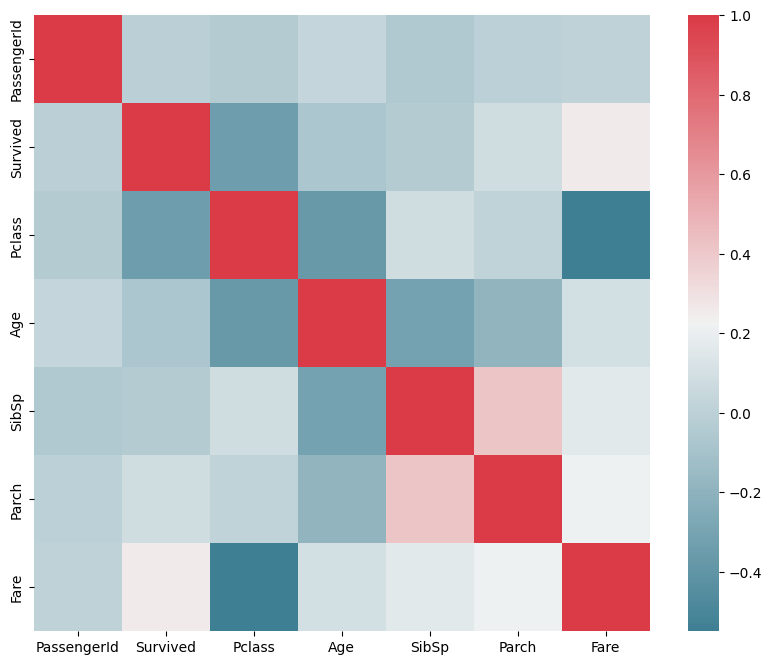

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
corr = titanic.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

#New Features

In [16]:
titanic['Name_len']=titanic.Name.str.len()
titanic['Ticket_First']=titanic.Ticket.str[0]
titanic['FamilyCount']=titanic.SibSp+titanic.Parch
titanic['Cabin_First']=titanic.Cabin.str[0]

In [17]:
# Regular expression to get the title of the Name
titanic['title'] = titanic.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

titanic.title.value_counts().reset_index()

,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


# Preprocessing and Prepare data for statistical modeling



>**a. Imput Missing or Zero values to the Fare variable**



    Imputing refers to using a model to replace missing values.

In [18]:
print((titanic.Fare == 0).sum())

15


In [19]:
# mark zero values as missing or NaN
titanic.Fare = titanic.Fare.replace(0, np.NaN)

In [20]:
# validate to see if there are no more zero values
print((titanic.Fare == 0).sum())

0


In [21]:
# keep the index
titanic[titanic.Fare.isnull()].index

Int64Index([179, 263, 271, 277, 302, 413, 466, 481, 597, 633, 674, 732, 806,
            815, 822],
           dtype='int64')

In [22]:
titanic.Fare.mean()

32.75564988584475

In [23]:
# impute the missing Fare values with the mean Fare value
titanic.Fare.fillna(titanic.Fare.mean(),inplace=True)
# validate if any null values are present after the imputation
titanic[titanic.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title




> **b. Imput Missing or Zero values to the Age variable**



In [34]:
# we see that there are 0 Zero values
print((titanic.Age == 0).sum())

0


In [35]:
# impute the missing Age values with the mean Fare value
titanic.Age.fillna(titanic.Age.mean(),inplace=True)
# validate if any null values are present after the imputation
titanic[titanic.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_len,Ticket_First,FamilyCount,Cabin_First,title




> **c. Imput Missing or Zero values to the Cabin variable**



In [36]:
# We see that a majority 77% of the Cabin variable has missing values.
titanic.Cabin.isnull().mean()

AttributeError: 'DataFrame' object has no attribute 'Cabin'

In [37]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    int64  
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Embarked      891 non-null    int64  
 11  Name_len      891 non-null    int64  
 12  Ticket_First  891 non-null    object 
 13  FamilyCount   891 non-null    int64  
 14  Cabin_First   204 non-null    object 
 15  title         890 non-null    object 
dtypes: float64(2), int64(9), object(5)
memory usage: 111.5+ KB




 **STATISTICAL MODELLING**



In [38]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Name_len', 'Ticket_First',
       'FamilyCount', 'Cabin_First', 'title'],
      dtype='object')

In [39]:
trainML = titanic[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'title']]

In [40]:
# drop rows of missing values
trainML = trainML.dropna()

In [41]:
# check the datafram has any missing values
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_First    0
FamilyCount     0
title           0
dtype: int64

**A single predictor model with logistic regression**

We use logistic regression as the response variable is a binary classification



>**Regression on survival on Age**



In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
X_Age = trainML[['Age']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Age,y)
# Make a prediction
y_predict = lr.predict(X_Age)
y_predict[:10]
(y == y_predict).mean()

0.6182432432432432

The prediction accuracy is marginally better than the base line accuracy of 61.5% which we got earlier



> **Regression on survival on Fare**



In [ ]:
X_Fare = trainML[['Fare']].values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_Fare,y)
# Make a prediction
y_predict = lr.predict(X_Fare)
y_predict[:10]
(y == y_predict).mean()

0.6621621621621622

The prediction accuracy got a bit better than the Age variable and much better than 61.5% base accuracy

> **Regression on survive on Sex(using a Categorical Variable)**




In [ ]:
X_sex = pd.get_dummies(trainML['Sex']).values
y = trainML['Survived'].values
# Use the fit method to train
lr.fit(X_sex, y)
# Make a prediction
y_predict = lr.predict(X_sex)
y_predict[:10]
(y == y_predict).mean()

0.786036036036036

The gender of passenger is a strong predictor and purely predciting based on gender, the model accuracy increased to 78%



> **Regression on survive on PClass(using a Categorical Variable)**



In [ ]:
X_pclass = pd.get_dummies(trainML['Pclass']).values
y = trainML['Survived'].values
lr = LogisticRegression()
lr.fit(X_pclass, y)
# Make a prediction
y_predict = lr.predict(X_pclass)
y_predict[:10]
(y == y_predict).mean()

0.6779279279279279

Gender of the passenger seems a strong predictor compared to the PClass of the passenger on Survival



> **Predicting Survival based on Random forest model**



In [ ]:
from sklearn.ensemble import RandomForestClassifier
X=trainML[['Age', 'SibSp', 'Parch',
       'Fare', 'Name_len', 'FamilyCount']].values # Taking all the numerical values
y = trainML['Survived'].values
RF = RandomForestClassifier()
RF.fit(X, y)
# Make a prediction
y_predict = RF.predict(X)
y_predict[:10]
(y == y_predict).mean()

0.9887387387387387

Random forest did a good job in predicting the survival with a 97% accuracy

#Building Machine Learning Models



> **Handling the missing values**



In [5]:
# Droping the Cabin column as it won't be much of importance
titanic = titanic.drop(columns='Cabin', axis=1)

In [6]:
# Replacing the missing values in the Age column with mean value
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [7]:
# Finding the mode value of Embarked column as it occurs most no. of times
print(titanic['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [8]:
# Replacing the missing values in Embarked column with mode value
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)



>**Transformation into a categorical column**



In [9]:
# Let’s convert that into integer type values, and transform it into a categorical column
titanic.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)



> **Let’s split the data into the target and feature variables**



In [10]:
X= titanic.drop(columns = ['PassengerId','Name','Ticket','Survived'],axis=1)
Y= titanic['Survived']

# Here, X is the feature variable, containing all the features like Pclass, Age, Sex, Embarked, etc. excluding the Survived column.
# Y, on the other hand, is the target variable, as that is the result that we want to determine,i.e, whether a person is alive.

In [11]:
#Now, we will be splitting the data into four variables, namely, X_train, Y_train, X_test, Y_test.
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)



>**Model, predict and solve the problem**



In [12]:
# Importing Classifier Modules

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier

In [13]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.76

In [14]:
# Support Vector Machines
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

67.98

In [ ]:
# KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

84.41

In [ ]:
# Gaussian Naive Bayes
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian


79.35

In [ ]:
# Perceptron
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

74.44

In [ ]:
# Linear SVC
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

81.18

In [ ]:
# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

76.97

In [ ]:
# Decision Tree
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

98.6

In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.6



> **Confusion Matrix**



Accuracy: 98 % 

Confusion Matrix in Numbers
[[446   3]
 [  7 256]]

Confusion Matrix in Percentage
[[0.99 0.01]
 [0.03 0.97]]



<Axes: >

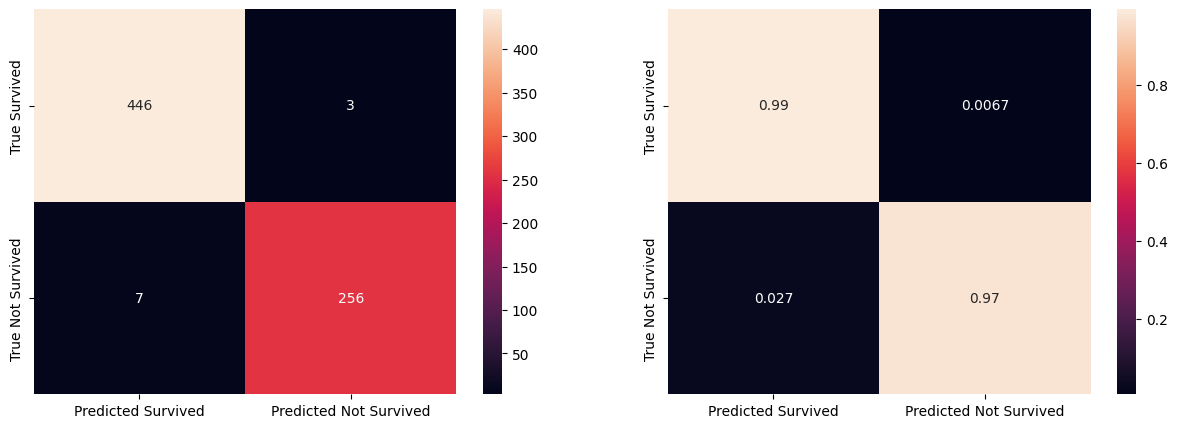

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, Y_train)

y_pred_random_forest_training_set = clf.predict(X_train)
acc_random_forest = round(clf.score(X_train, Y_train) * 100, 2)


print ("Accuracy: %i %% \n"%acc_random_forest)

class_names = ['Survived', 'Not Survived']


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_train, y_pred_random_forest_training_set )
np.set_printoptions(precision=2)


print ('Confusion Matrix in Numbers')
print (cnf_matrix)
print ('')

cnf_matrix_percent = cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

print ('Confusion Matrix in Percentage')
print (cnf_matrix_percent)
print ('')

true_class_names = ['True Survived', 'True Not Survived']
predicted_class_names = ['Predicted Survived', 'Predicted Not Survived']

df_cnf_matrix = pd.DataFrame(cnf_matrix,
                             index = true_class_names,
                             columns = predicted_class_names)

df_cnf_matrix_percent = pd.DataFrame(cnf_matrix_percent,
                                     index = true_class_names,
                                     columns = predicted_class_names)

plt.figure(figsize = (15,5))

plt.subplot(121)
sns.heatmap(df_cnf_matrix, annot=True, fmt='d')

plt.subplot(122)
sns.heatmap(df_cnf_matrix_percent, annot=True)




> **Model Selection**



In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'Perceptron',
              'Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log,
              acc_random_forest, acc_gaussian, acc_perceptron,
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,98.60
8,Decision Tree,98.60
1,KNN,84.41
7,Linear SVC,81.18
2,Logistic Regression,80.76
4,Naive Bayes,79.35
6,Stochastic Gradient Decent,76.97
5,Perceptron,74.44
0,Support Vector Machines,67.98


**Random Forests** and **Decision Trees** are the most accurate (96.97%) in predicting the survival of passengers and they are select to predicted the testing data.:



> **Visualize the Decision Tree**



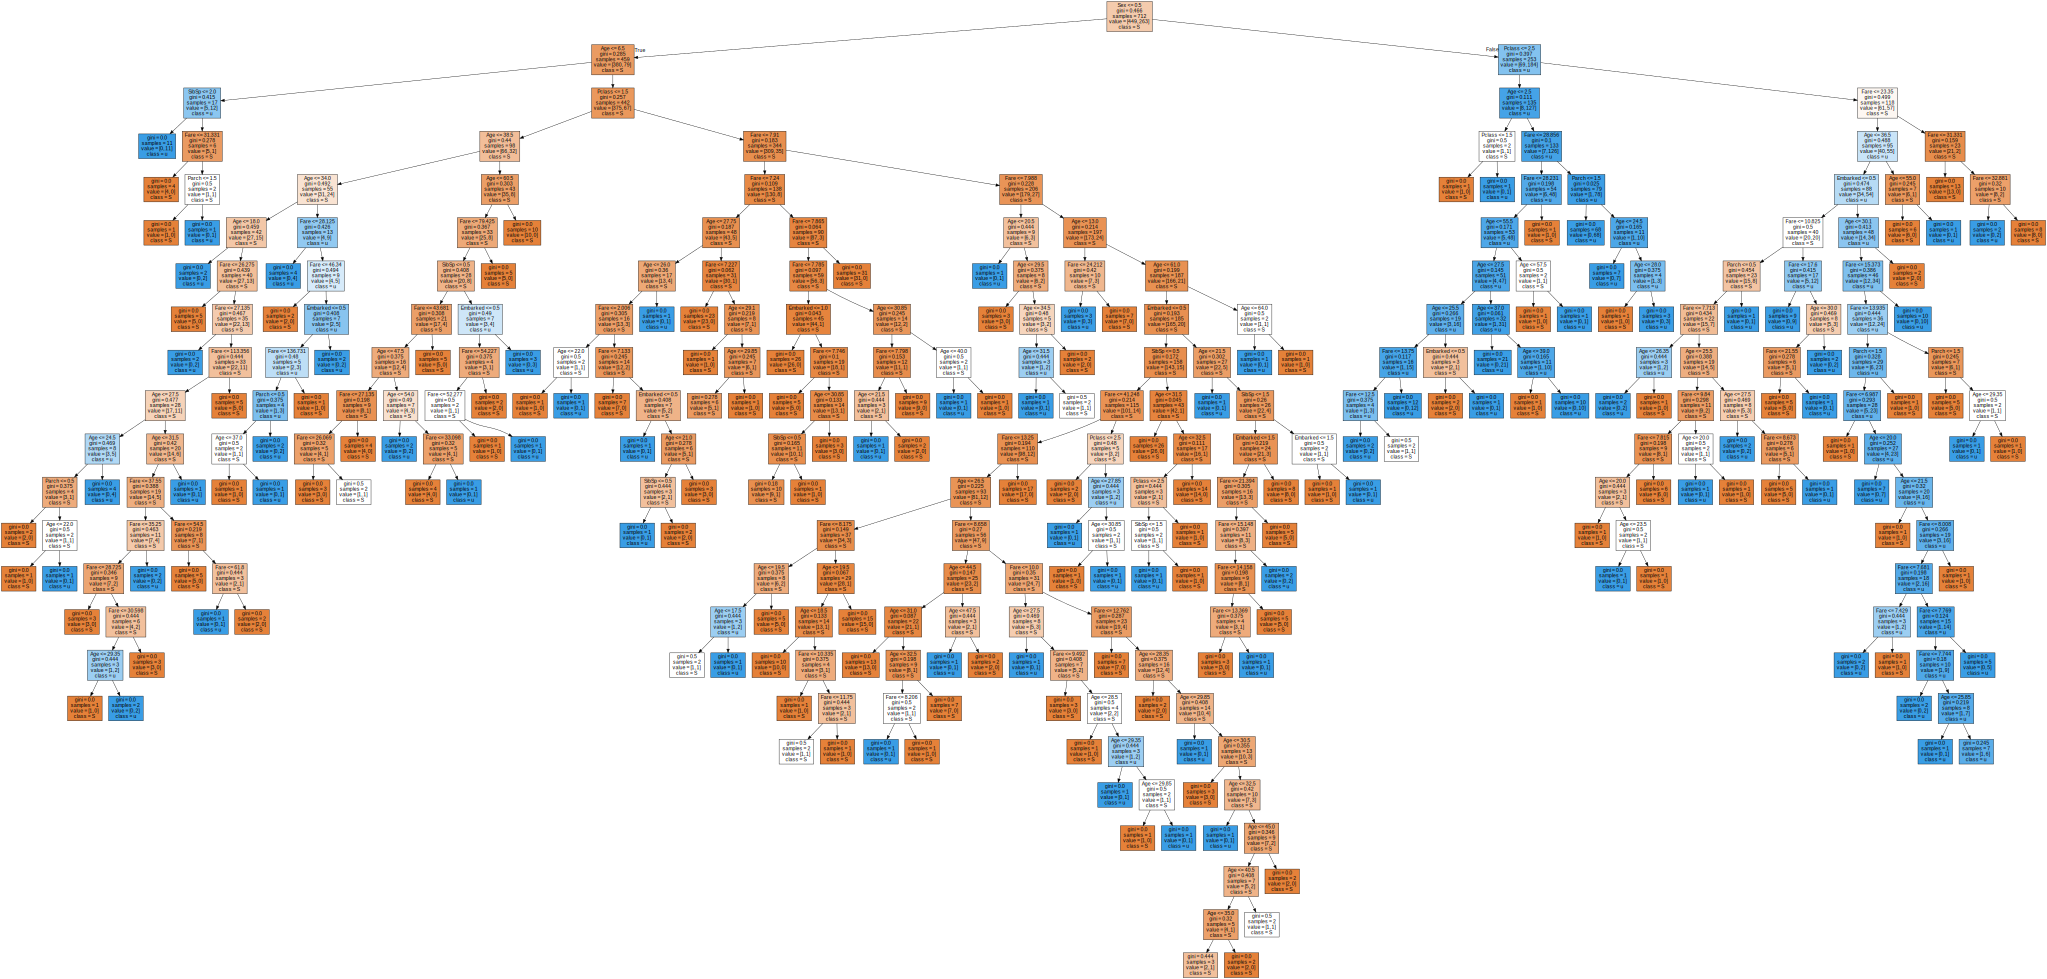

In [ ]:
import graphviz
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=X_train.columns.values,
                                class_names='Survived',
                                filled=True)
# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph



---


## I hope this walkthrough helped you, I had a great time doing the project myself and hope you enjoy it too. Cheers!!